<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Sim Xiang Ying S10227827H</h3><h4>Diploma in Data Science</h4></th>
    </tr>
</table>

<a id="top"></a>
[Back to bottom (report)](#bottom)

In [85]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for the Q-Q plots
import scipy.stats as stats

# sklearn preprocess
from sklearn.model_selection import train_test_split

# to impute missing data with sklearn
from sklearn.pipeline import Pipeline

# to impute missing data with feature-engine
import feature_engine.imputation as mdi
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

# for encoding using feature-engine
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import CountFrequencyEncoder

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Step 1: Load dataset
Run the code block below to load the f1races dataset, along with a few of the necessary Python libaries required for this assignement. The dataset will be loaded successfully if the size of the dataset is reported.

In [86]:
# circuits = pd.read_csv('./datasets/f1db_csv_mod/circuits_mod.csv')
# constructor_r = pd.read_csv('./datasets/f1db_csv_mod/constructor_results_mod.csv')
# constructor_stan = pd.read_csv('./datasets/f1db_csv_mod/constructor_standings_mod.csv')
# driver_stan = pd.read_csv('./datasets/f1db_csv_mod/driver_standings_mod.csv')
# lap_times = pd.read_csv('./datasets/f1db_csv_mod/lap_times_mod.csv')
# seasons = pd.read_csv('./datasets/f1db_csv_mod/seasons_mod.csv')   

stat = pd.read_csv('./datasets/f1db_csv_mod/status_mod.csv')
quali = pd.read_csv('./datasets/f1db_csv_mod/qualifying_mod.csv')
pit_stops = pd.read_csv('./datasets/f1db_csv_mod/pit_stops_mod.csv')
constructors = pd.read_csv('./datasets/f1db_csv_mod/constructors_mod.csv')
drivers = pd.read_csv('./datasets/f1db_csv_mod/drivers_mod.csv')
races = pd.read_csv('./datasets/f1db_csv_mod/races_mod.csv')
results = pd.read_csv('./datasets/f1db_csv_mod/results_mod.csv')

## Step 2: Data Wrangling on multiple tables 

In [87]:
f1_race = pd.merge(results, races[['raceId', 'date', 'name', 'round']], on = 'raceId', how='left')
f1_race = pd.merge(f1_race, drivers[['driverId', 'nationality', 'dob', 'forename', 'surname']], on='driverId', how='left')
f1_race = pd.merge(f1_race, pit_stops[['raceId', 'driverId', 'duration']], on = ['driverId','raceId'], how='left')
f1_race = pd.merge(f1_race, constructors[['constructorId', 'name']], on = 'constructorId', how = 'left')
f1_race = pd.merge(f1_race, quali[['raceId', 'driverId', 'constructorId','q1', 
                        'q2', 'q3']], on =['raceId','driverId', 'constructorId'], how='left')
f1_race = pd.merge(f1_race, stat[['statusId','status']], on ='statusId', how='left')

In [88]:
# Create a copy of the DataFrame, f1_race_bkup
f1_race_bkup = f1_race.copy()

# View the first 5 rows of the dataframe
f1_race.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,nationality,dob,forename,surname,duration,name_y,q1,q2,q3,status
0,1,18,1,1,22,1,1,1,1,10.0,...,British,1985-01-07,Lewis,Hamilton,NaN,McLaren,1:26.572,1:25.187,1:26.714,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,German,1977-05-10,Nick,Heidfeld,NaN,BMW Sauber,1:25.960,1:25.518,1:27.236,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,German,1985-06-27,Nico,Rosberg,NaN,Williams,1:26.295,1:26.059,1:28.687,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,Spanish,1981-07-29,Fernando,Alonso,NaN,Renault,1:26.907,1:26.188,\N,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,Finnish,1981-10-19,Heikki,Kovalainen,NaN,McLaren,1:25.664,1:25.452,1:27.079,Finished


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,nationality,dob,forename,surname,duration,name_y,q1,q2,q3,status
0,1,18,1,1,22,1,1,1,1,10.0,...,British,1985-01-07,Lewis,Hamilton,NaN,McLaren,1:26.572,1:25.187,1:26.714,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,German,1977-05-10,Nick,Heidfeld,NaN,BMW Sauber,1:25.960,1:25.518,1:27.236,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,German,1985-06-27,Nico,Rosberg,NaN,Williams,1:26.295,1:26.059,1:28.687,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,Spanish,1981-07-29,Fernando,Alonso,NaN,Renault,1:26.907,1:26.188,\N,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,Finnish,1981-10-19,Heikki,Kovalainen,NaN,McLaren,1:25.664,1:25.452,1:27.079,Finished


In [89]:
# show the info of the dataset
# useful in checking for any null values: 
f1_race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29936 entries, 0 to 29935
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         29936 non-null  int64  
 1   raceId           29936 non-null  int64  
 2   driverId         29936 non-null  int64  
 3   constructorId    29936 non-null  int64  
 4   number           29936 non-null  object 
 5   grid             29936 non-null  int64  
 6   position         29936 non-null  object 
 7   positionText     29936 non-null  object 
 8   positionOrder    29936 non-null  int64  
 9   points           29936 non-null  float64
 10  laps             29936 non-null  int64  
 11  time             29936 non-null  object 
 12  milliseconds     29936 non-null  object 
 13  fastestLap       29936 non-null  object 
 14  rank             29936 non-null  object 
 15  fastestLapTime   29936 non-null  object 
 16  fastestLapSpeed  29936 non-null  object 
 17  statusId    

In [90]:
# to quantify the total number of missing values 
f1_race.isnull().sum().sort_values()

resultId               0
name_y                 0
surname                0
forename               0
dob                    0
nationality            0
round                  0
name_x                 0
statusId               0
fastestLapSpeed        0
rank                   0
fastestLap             0
fastestLapTime         0
time                   0
raceId                 0
driverId               0
constructorId          0
number                 0
milliseconds           0
position               0
grid                   0
positionOrder          0
points                 0
laps                   0
positionText           0
status                 0
date                 358
q1                 16311
q2                 16519
q3                 16710
duration           21108
dtype: int64

resultId               0
name_y                 0
surname                0
forename               0
dob                    0
nationality            0
round                  0
name_x                 0
statusId               0
fastestLapSpeed        0
rank                   0
fastestLap             0
fastestLapTime         0
time                   0
raceId                 0
driverId               0
constructorId          0
number                 0
milliseconds           0
position               0
grid                   0
positionOrder          0
points                 0
laps                   0
positionText           0
status                 0
date                 358
q1                 16311
q2                 16519
q3                 16710
duration           21108
dtype: int64

duration           0.705104
q3                 0.558191
q2                 0.551811
q1                 0.544862
date               0.011959
resultId           0.000000
fastestLapSpeed    0.000000
name_y             0.000000
surname            0.000000
forename           0.000000
dob                0.000000
nationality        0.000000
round              0.000000
name_x             0.000000
statusId           0.000000
fastestLapTime     0.000000
raceId             0.000000
rank               0.000000
fastestLap         0.000000
milliseconds       0.000000
time               0.000000
laps               0.000000
points             0.000000
positionOrder      0.000000
positionText       0.000000
position           0.000000
grid               0.000000
number             0.000000
constructorId      0.000000
driverId           0.000000
status             0.000000
dtype: float64
duration           0.705104
q3                 0.558191
q2                 0.551811
q1                 0.544862
date 

Text(0.5, 1.0, 'Quantifying missing data')

Text(0.5, 1.0, 'Quantifying missing data')

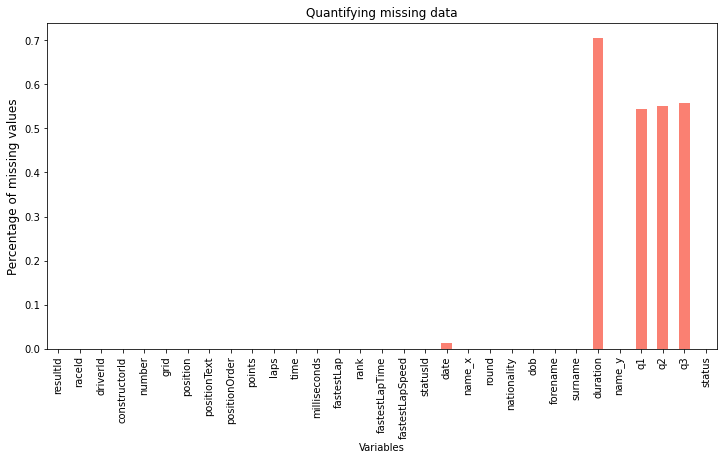

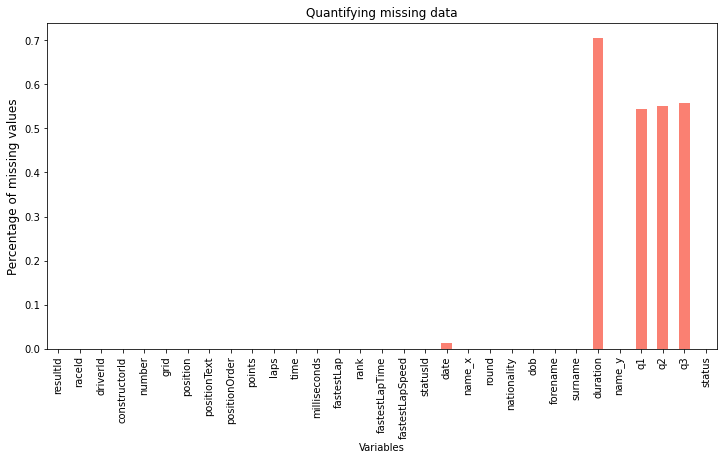

In [91]:
# Visualise the percentage of missing values for each variable
print(f1_race.isnull().mean().sort_values(ascending = False))

f1_race.isnull().mean().plot.bar(figsize=(12,6), color='salmon')
plt.ylabel('Percentage of missing values', fontsize =12)
plt.xlabel('Variables')
plt.title('Quantifying missing data')

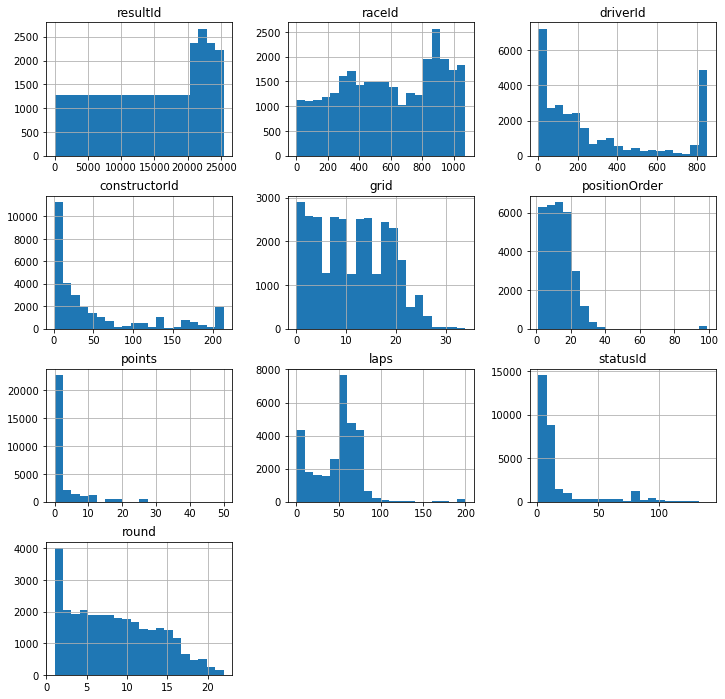

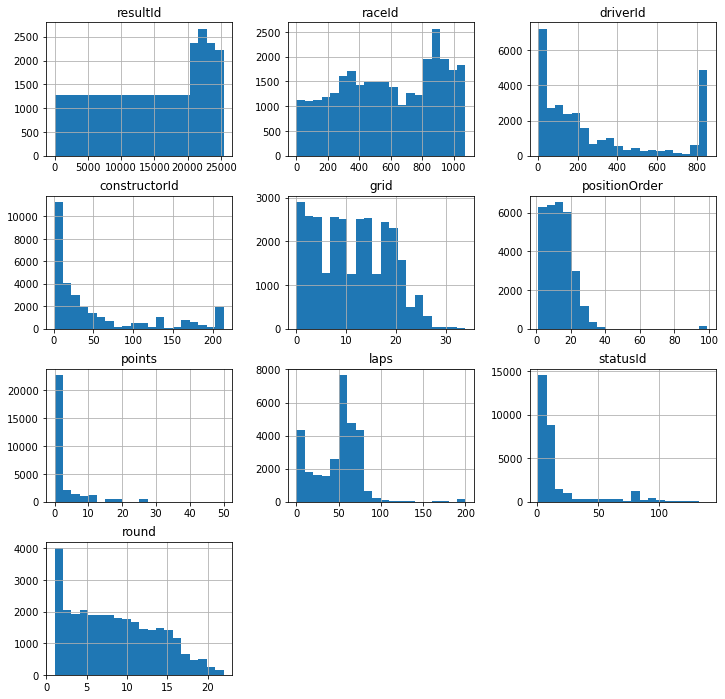

In [92]:
# histogram 
f1_race.hist(bins=20,figsize=(12,12))
plt.show()

<AxesSubplot:title={'center':'f1_race'}>

<AxesSubplot:title={'center':'f1_race'}>

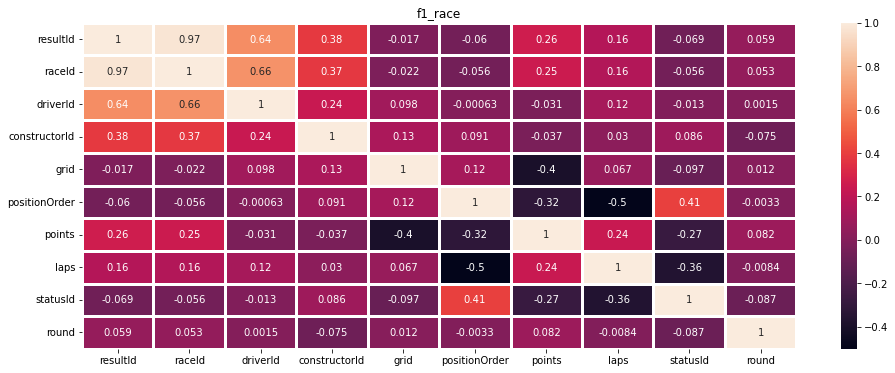

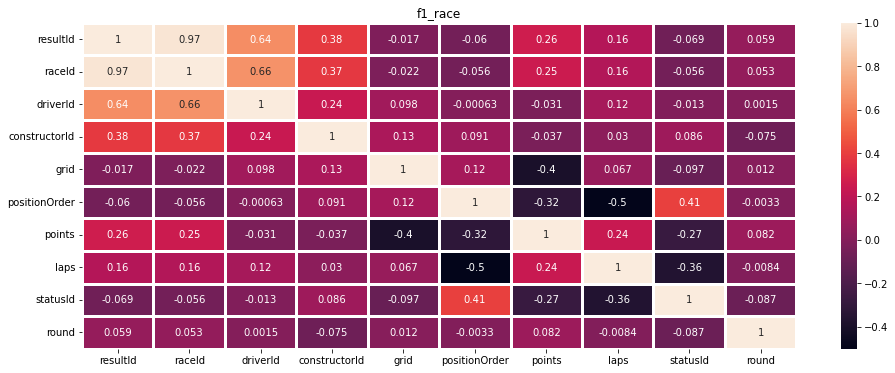

In [93]:
# heatmap
plt.figure(figsize=(16,6))
plt.title('f1_race')
sns.heatmap(f1_race.corr(), annot=True, linewidths=3.0)

## Step 3: Data Cleansing and Transformation 

In [94]:
# extract current year
from datetime import date
year = date.today().year
year

2022

2022

In [95]:
# calculate driver's age
# current year - dob
f1_race['dob'] = f1_race['dob'].str[:4].astype(int)
f1_race['age'] = year - f1_race['dob']
f1_race['age']

0        37
1        45
2        37
3        41
4        41
         ..
29931    32
29932    27
29933    29
29934    24
29935    43
Name: age, Length: 29936, dtype: int32

0        37
1        45
2        37
3        41
4        41
         ..
29931    32
29932    27
29933    29
29934    24
29935    43
Name: age, Length: 29936, dtype: int32

In [96]:
# driver's name
f1_race['driverName'] = f1_race['forename'] + " " + f1_race['surname']

In [97]:
# drop columns
# excluding time as using ms to convert
f1_race.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId',
        'constructorId', 'dob', 'time', 'forename', 'surname'], axis=1, inplace=True)

In [98]:
# rename columns
# position order: final position
f1_race.rename(columns={'rank': 'fastest_lap_rank', 'name_x': 'grandprix_name',
                  'nationality': 'driver_nationality', 'name_y': 'construc_name',
                  'milliseconds': 'time_taken', 'duration': 'pitstop_duration',
                        'fastestLapSpeed': 'fastest_lap_speed', 
                        'fastestLapTime': 'fastest_lap_time'}, inplace=True)

In [99]:
# rearrange columns
f1_race = f1_race[['raceId', 'date', 'grandprix_name', 'round', 'driverId', 'driverName', 'age',
                   'driver_nationality', 'construc_name', 'grid', 
                   'positionOrder', 'points', 'time_taken', 'q1', 'q2', 'q3', 'status',
                   'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed', 'pitstop_duration',
                  ]]

In [100]:
# replace \n values to 'nans' in df
f1_race.replace(r'\N', np.nan,inplace=True)

# races table filling in "incorrect years" 
f1_race['date']=f1_race['date'].replace(['9/4/12005'], '9/4/2005')
f1_race['date']=f1_race['date'].replace(['4/5/12009'], '4/5/2009')
f1_race['date']=f1_race['date'].replace(['6/7/12009'], '6/7/2009')
f1_race['date']=f1_race['date'].replace(['7/10/12011'], '7/10/2011')
f1_race['date']=f1_race['date'].replace(['4/12/12015'], '4/12/2015')
f1_race['date']=f1_race['date'].replace(['11/1/12015'], '11/1/2015')
f1_race['date']=f1_race['date'].replace(['10/29/12017'], '10/29/2017')
f1_race['date']=f1_race['date'].replace(['9/16/12018'], '9/16/2018')
f1_race['date']=f1_race['date'].replace(['8/30/12020'], '8/30/2020')
f1_race['date']=f1_race['date'].replace(['4/18/12021'], '4/18/2021')

# change format
f1_race['date'] = pd.to_datetime(f1_race['date']) 

# extract year
f1_race['eventYear'] = f1_race['date'].dt.year

# drop 'date'
f1_race.drop(['date'], axis=1, inplace=True)

In [101]:
# fill in blanks for "eventYear"
f1_race.loc[:,['raceId','driverName','eventYear']]
modify_GGP =f1_race.loc[(f1_race['raceId'] == 27)]
modify_GGP = modify_GGP['eventYear'].fillna(2008)
f1_race.update(modify_GGP)

modify_JGP = f1_race.loc[(f1_race['raceId'] == 69)]
modify_JGP = modify_JGP['eventYear'].fillna(2006)
f1_race.update(modify_JGP)

modify_CGP = f1_race.loc[(f1_race['raceId'] == 105)]
modify_CGP = modify_CGP['eventYear'].fillna(2004)
f1_race.update(modify_CGP)

modify_AGP = f1_race.loc[(f1_race['raceId'] == 900)]
modify_AGP = modify_AGP['eventYear'].fillna(2014)
f1_race.update(modify_AGP)

modify_BGP = f1_race.loc[(f1_race['raceId'] == 917)]
modify_BGP = modify_BGP['eventYear'].fillna(2014)
f1_race.update(modify_BGP)

modify_AGP16 = f1_race.loc[(f1_race['raceId'] == 948)]
modify_AGP16 = modify_AGP16['eventYear'].fillna(2016)
f1_race.update(modify_AGP16)

modify_IGP = f1_race.loc[(f1_race['raceId'] == 961)]
modify_IGP = modify_IGP['eventYear'].fillna(2016)
f1_race.update(modify_IGP)

modify_CGP18 = f1_race.loc[(f1_race['raceId'] == 991)]
modify_CGP18 = modify_CGP18['eventYear'].fillna(2018)
f1_race.update(modify_CGP18)

modify_USGP = f1_race.loc[(f1_race['raceId'] == 1028)]
modify_USGP = modify_USGP['eventYear'].fillna(2019)
f1_race.update(modify_USGP)

modify_HGP = f1_race.loc[(f1_race['raceId'] == 1062)]
modify_HGP = modify_HGP['eventYear'].fillna(2021)
f1_race.update(modify_HGP)

f1_race.head()

,raceId,grandprix_name,round,driverId,driverName,age,driver_nationality,construc_name,grid,positionOrder,...,time_taken,q1,q2,q3,status,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear
0,18,Australian Grand Prix,1,1,Lewis Hamilton,37,British,McLaren,1,1,...,5690616,1:26.572,1:25.187,1:26.714,Finished,2,01:27.5,218.3,NaN,2008.0
1,18,Australian Grand Prix,1,2,Nick Heidfeld,45,German,BMW Sauber,5,2,...,5696094,1:25.960,1:25.518,1:27.236,Finished,3,01:27.7,217.586,NaN,2008.0
2,18,Australian Grand Prix,1,3,Nico Rosberg,37,German,Williams,7,3,...,5698779,1:26.295,1:26.059,1:28.687,Finished,5,01:28.1,216.719,NaN,2008.0
3,18,Australian Grand Prix,1,4,Fernando Alonso,41,Spanish,Renault,11,4,...,5707797,1:26.907,1:26.188,NaN,Finished,7,01:28.6,215.464,NaN,2008.0
4,18,Australian Grand Prix,1,5,Heikki Kovalainen,41,Finnish,McLaren,3,5,...,5708630,1:25.664,1:25.452,1:27.079,Finished,1,01:27.4,218.385,NaN,2008.0


,raceId,grandprix_name,round,driverId,driverName,age,driver_nationality,construc_name,grid,positionOrder,...,time_taken,q1,q2,q3,status,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear
0,18,Australian Grand Prix,1,1,Lewis Hamilton,37,British,McLaren,1,1,...,5690616,1:26.572,1:25.187,1:26.714,Finished,2,01:27.5,218.3,NaN,2008.0
1,18,Australian Grand Prix,1,2,Nick Heidfeld,45,German,BMW Sauber,5,2,...,5696094,1:25.960,1:25.518,1:27.236,Finished,3,01:27.7,217.586,NaN,2008.0
2,18,Australian Grand Prix,1,3,Nico Rosberg,37,German,Williams,7,3,...,5698779,1:26.295,1:26.059,1:28.687,Finished,5,01:28.1,216.719,NaN,2008.0
3,18,Australian Grand Prix,1,4,Fernando Alonso,41,Spanish,Renault,11,4,...,5707797,1:26.907,1:26.188,NaN,Finished,7,01:28.6,215.464,NaN,2008.0
4,18,Australian Grand Prix,1,5,Heikki Kovalainen,41,Finnish,McLaren,3,5,...,5708630,1:25.664,1:25.452,1:27.079,Finished,1,01:27.4,218.385,NaN,2008.0


In [102]:
# change datatypes
f1_race.fastest_lap_rank = f1_race.fastest_lap_rank.astype(float)
f1_race.fastest_lap_speed = f1_race.fastest_lap_speed.astype(float)
f1_race.time_taken = f1_race.time_taken.astype(float)
f1_race.eventYear = f1_race.eventYear.astype(int)

# check updated "eventYear"
# "eventYear" sorted 
print(sorted(f1_race['eventYear'].unique()))

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [103]:
# time taken to complete race
f1_race['time_taken'] = pd.to_datetime(f1_race['time_taken'],
             unit='ms').dt.strftime('%H:%M:%S')

In [104]:
# change format to datetime 
variable = ['q1', 'q2', 'q3']
for i in variable:
    f1_race[i] = pd.to_datetime(f1_race[i],errors = 'coerce')

pd.to_datetime(f1_race.q1)
f1_race['q1'] = f1_race['q1'].dt.time

pd.to_datetime(f1_race.q2)
f1_race['q2'] = f1_race['q2'].dt.time

pd.to_datetime(f1_race.q3)
f1_race['q3'] = f1_race['q3'].dt.time

In [105]:
# show the info of the dataset
# useful in checking for any null values: 
f1_race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29936 entries, 0 to 29935
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raceId              29936 non-null  int64  
 1   grandprix_name      29936 non-null  object 
 2   round               29936 non-null  int64  
 3   driverId            29936 non-null  int64  
 4   driverName          29936 non-null  object 
 5   age                 29936 non-null  int32  
 6   driver_nationality  29936 non-null  object 
 7   construc_name       29936 non-null  object 
 8   grid                29936 non-null  int64  
 9   positionOrder       29936 non-null  int64  
 10  points              29936 non-null  float64
 11  time_taken          9236 non-null   object 
 12  q1                  13446 non-null  object 
 13  q2                  8100 non-null   object 
 14  q3                  4991 non-null   object 
 15  status              29936 non-null  object 
 16  fast

In [106]:
# reset index
f1_race.reset_index(drop=True, inplace=True)

### 3.1 Outliers 
[Back to top](#top)

In [107]:
def find_boundaries(f1_race, variable, distance):

    IQR = f1_race[variable].quantile(0.75) - f1_race[variable].quantile(0.25)

    lower_boundary = f1_race[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = f1_race[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [108]:
upper_boundary, lower_boundary = find_boundaries(f1_race,'points', 1.5)
upper_boundary, lower_boundary

outliers = np.where(f1_race['points'] > upper_boundary, True,
                    np.where(f1_race['points'] < lower_boundary, True, False))

print('The number of points with outliers is {}'.format(outliers.sum()))
outliers_f1_race = f1_race.loc[outliers, 'points']
print(outliers_f1_race)

The number of points with outliers is 4918
0        10.0
1         8.0
2         6.0
22       10.0
23        8.0
         ... 
29913    10.0
29914    10.0
29915     8.0
29916     6.0
29917     6.0
Name: points, Length: 4918, dtype: float64
The number of points with outliers is 4918
0        10.0
1         8.0
2         6.0
22       10.0
23        8.0
         ... 
29913    10.0
29914    10.0
29915     8.0
29916     6.0
29917     6.0
Name: points, Length: 4918, dtype: float64


In [109]:
upper_boundary, lower_boundary = find_boundaries(f1_race,'fastest_lap_speed', 1.5)
upper_boundary, lower_boundary

outliers = np.where(f1_race['fastest_lap_speed'] > upper_boundary, True,
                    np.where(f1_race['fastest_lap_speed'] < lower_boundary, True, False))

print('The number of fastest lap speed with outliers is {}'.format(outliers.sum()))
outliers_f1_race = f1_race.loc[outliers, 'fastest_lap_speed']
print(outliers_f1_race)

The number of fastest lap speed with outliers is 441
108      153.152
109      154.286
110      154.379
111      152.133
112      152.614
          ...   
28813    143.736
28814    141.108
28815    141.111
28816    140.802
29310    156.287
Name: fastest_lap_speed, Length: 441, dtype: float64
The number of fastest lap speed with outliers is 441
108      153.152
109      154.286
110      154.379
111      152.133
112      152.614
          ...   
28813    143.736
28814    141.108
28815    141.111
28816    140.802
29310    156.287
Name: fastest_lap_speed, Length: 441, dtype: float64


In [110]:
upper_boundary, lower_boundary = find_boundaries(f1_race,'positionOrder', 1.5)
upper_boundary, lower_boundary

outliers = np.where(f1_race['positionOrder'] > upper_boundary, True,
                    np.where(f1_race['positionOrder'] < lower_boundary, True, False))

print('The number of position order with outliers is {}'.format(outliers.sum()))
outliers_f1_race = f1_race.loc[outliers, 'positionOrder']
print(outliers_f1_race)

The number of position order with outliers is 160
268      99
288      99
308      99
328      99
368      99
         ..
29859    99
29860    99
29906    99
29907    99
29908    99
Name: positionOrder, Length: 160, dtype: int64
The number of position order with outliers is 160
268      99
288      99
308      99
328      99
368      99
         ..
29859    99
29860    99
29906    99
29907    99
29908    99
Name: positionOrder, Length: 160, dtype: int64


In [111]:
def diagnostic_plots(f1_race, variable):

    plt.figure(figsize=(18, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(f1_race[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(f1_race[variable], dist="norm", plot=plt)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=f1_race[variable])
    plt.title('Boxplot: {}'.format(variable))
    plt.show()

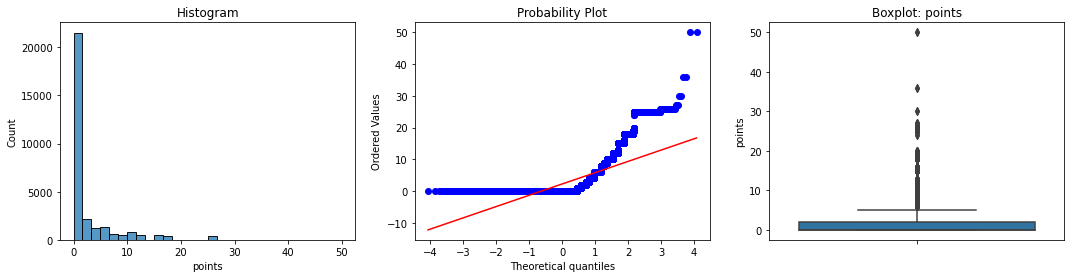

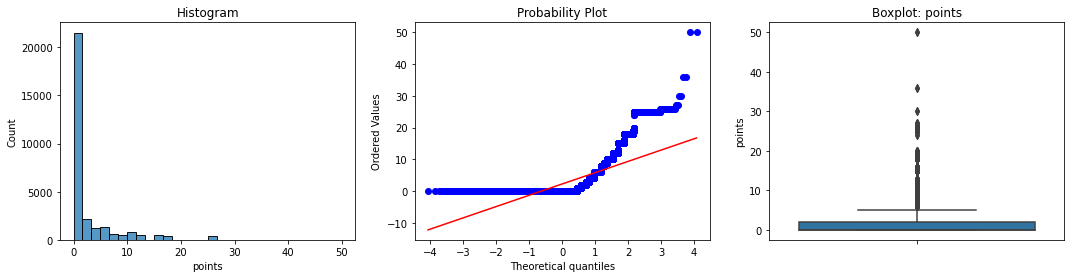

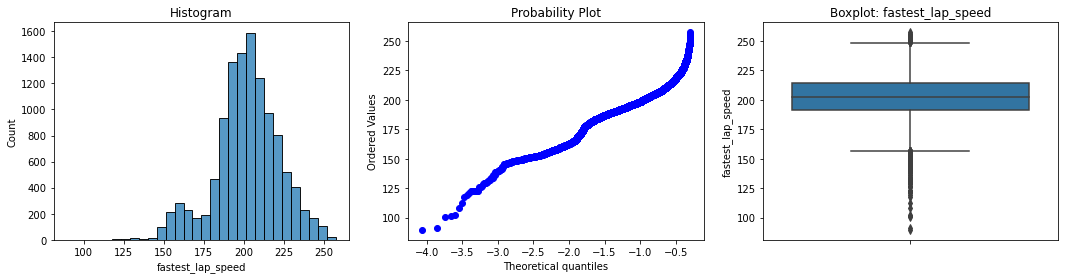

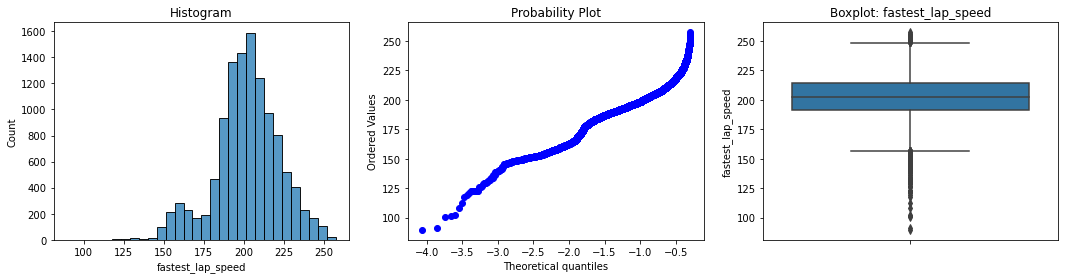

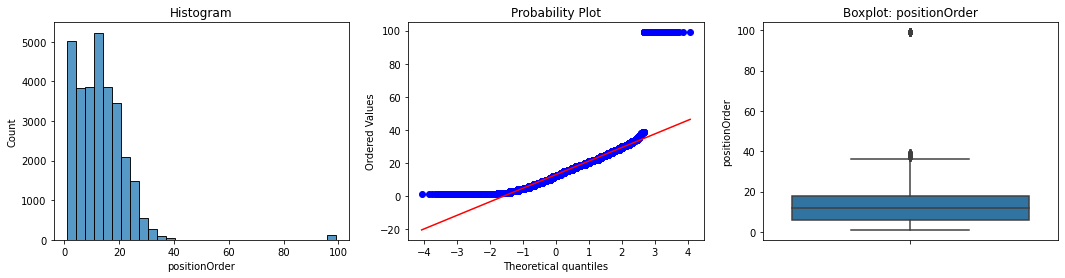

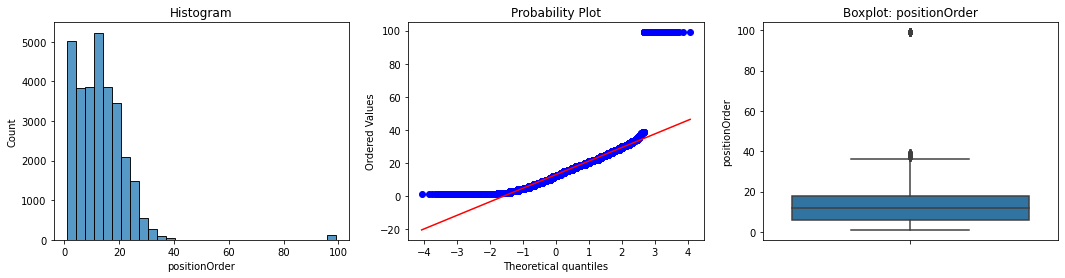

In [112]:
# outliers in 'points'

diagnostic_plots(f1_race, 'points')

# outliers in 'fastest_lap_speed'

diagnostic_plots(f1_race, 'fastest_lap_speed')

# outliers in 'positionOrder'

diagnostic_plots(f1_race, 'positionOrder')

### 3.2 Train and Test Split 
[Back to top](#top)


In [113]:
# separate into training and testing set
# target variable as 'points'
X_train, X_test, y_train, y_test = train_test_split(
    f1_race.drop(['raceId', 'points'], axis=1), 
    f1_race['points'],test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((20955, 19), (8981, 19))

((20955, 19), (8981, 19))

In [114]:
X_train

,grandprix_name,round,driverId,driverName,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,q2,q3,status,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear
11212,Belgian Grand Prix,5,202,Didier Pironi,70,French,Ferrari,0,27,NaN,NaT,NaT,NaT,Withdrew,NaN,NaN,NaN,NaN,1982
29931,Abu Dhabi Grand Prix,22,815,Sergio Pérez,32,Mexican,Red Bull,4,15,NaN,01:23:21,01:23:08,01:22:56,Engine,2.0,01:26.4,219.993,21.385,2021
12786,Argentine Grand Prix,1,203,Gilles Villeneuve,72,Canadian,Ferrari,7,8,01:38:43,NaT,NaT,NaT,Finished,NaN,NaN,NaN,NaN,1978
320,Japanese Grand Prix,16,22,Rubens Barrichello,50,Brazilian,Honda,17,13,NaN,01:18:52,NaT,NaT,+1 Lap,16.0,01:20.6,203.869,NaN,2008
13575,Austrian Grand Prix,12,207,Mario Andretti,82,American,Team Lotus,3,24,NaN,NaT,NaT,NaT,Engine,NaN,NaN,NaN,NaN,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,Austrian Grand Prix,12,222,Jody Scheckter,72,South African,Wolf,7,25,NaN,NaT,NaT,NaT,Accident,NaN,NaN,NaN,NaN,1978
19648,Swiss Grand Prix,1,609,André Simon,102,French,Ferrari,4,10,NaN,NaT,NaT,NaT,Magneto,NaN,NaN,NaN,NaN,1952
9845,Portuguese Grand Prix,2,105,Michele Alboreto,66,Italian,Ferrari,5,2,02:01:30,NaT,NaT,NaT,Finished,NaN,NaN,NaN,NaN,1985
10799,Belgian Grand Prix,6,137,Nelson Piquet,70,Brazilian,Brabham,4,4,01:27:53,NaT,NaT,NaT,Finished,NaN,NaN,NaN,NaN,1983


,grandprix_name,round,driverId,driverName,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,q2,q3,status,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear
11212,Belgian Grand Prix,5,202,Didier Pironi,70,French,Ferrari,0,27,NaN,NaT,NaT,NaT,Withdrew,NaN,NaN,NaN,NaN,1982
29931,Abu Dhabi Grand Prix,22,815,Sergio Pérez,32,Mexican,Red Bull,4,15,NaN,01:23:21,01:23:08,01:22:56,Engine,2.0,01:26.4,219.993,21.385,2021
12786,Argentine Grand Prix,1,203,Gilles Villeneuve,72,Canadian,Ferrari,7,8,01:38:43,NaT,NaT,NaT,Finished,NaN,NaN,NaN,NaN,1978
320,Japanese Grand Prix,16,22,Rubens Barrichello,50,Brazilian,Honda,17,13,NaN,01:18:52,NaT,NaT,+1 Lap,16.0,01:20.6,203.869,NaN,2008
13575,Austrian Grand Prix,12,207,Mario Andretti,82,American,Team Lotus,3,24,NaN,NaT,NaT,NaT,Engine,NaN,NaN,NaN,NaN,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,Austrian Grand Prix,12,222,Jody Scheckter,72,South African,Wolf,7,25,NaN,NaT,NaT,NaT,Accident,NaN,NaN,NaN,NaN,1978
19648,Swiss Grand Prix,1,609,André Simon,102,French,Ferrari,4,10,NaN,NaT,NaT,NaT,Magneto,NaN,NaN,NaN,NaN,1952
9845,Portuguese Grand Prix,2,105,Michele Alboreto,66,Italian,Ferrari,5,2,02:01:30,NaT,NaT,NaT,Finished,NaN,NaN,NaN,NaN,1985
10799,Belgian Grand Prix,6,137,Nelson Piquet,70,Brazilian,Brabham,4,4,01:27:53,NaT,NaT,NaT,Finished,NaN,NaN,NaN,NaN,1983


In [115]:
# show the info of the X_train
# useful in checking for any null values: 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20955 entries, 11212 to 2732
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   grandprix_name      20955 non-null  object 
 1   round               20955 non-null  int64  
 2   driverId            20955 non-null  int64  
 3   driverName          20955 non-null  object 
 4   age                 20955 non-null  int32  
 5   driver_nationality  20955 non-null  object 
 6   construc_name       20955 non-null  object 
 7   grid                20955 non-null  int64  
 8   positionOrder       20955 non-null  int64  
 9   time_taken          6434 non-null   object 
 10  q1                  9385 non-null   object 
 11  q2                  5648 non-null   object 
 12  q3                  3482 non-null   object 
 13  status              20955 non-null  object 
 14  fastest_lap_rank    8154 non-null   float64
 15  fastest_lap_time    8009 non-null   object 
 16  f

### 3.3 Missing Value Imputation
#### Numerical features  
[Back to top](#top)

In [116]:
# find numerical variables
num_cols = [c for c in X_train.columns if X_train[c].dtypes!='O']
X_train[num_cols].isnull().mean().sort_values() 

round                0.00000
driverId             0.00000
age                  0.00000
grid                 0.00000
positionOrder        0.00000
eventYear            0.00000
fastest_lap_rank     0.61088
fastest_lap_speed    0.61780
dtype: float64

round                0.00000
driverId             0.00000
age                  0.00000
grid                 0.00000
positionOrder        0.00000
eventYear            0.00000
fastest_lap_rank     0.61088
fastest_lap_speed    0.61780
dtype: float64

#### Arbitrary Value Imputation

In [117]:
features_num = ['fastest_lap_rank', 'fastest_lap_speed']
imputer = ArbitraryNumberImputer(
    arbitrary_number=-1, variables=features_num)

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-1,
                       variables=['fastest_lap_rank', 'fastest_lap_speed'])

ArbitraryNumberImputer(arbitrary_number=-1,
                       variables=['fastest_lap_rank', 'fastest_lap_speed'])

In [118]:
# transform the data
X_train_num = imputer.transform(X_train)
X_test_num = imputer.transform(X_test)

X_train_num

,grandprix_name,round,driverId,driverName,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,q2,q3,status,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear
11212,Belgian Grand Prix,5,202,Didier Pironi,70,French,Ferrari,0,27,NaN,NaT,NaT,NaT,Withdrew,-1.0,NaN,-1.000,NaN,1982
29931,Abu Dhabi Grand Prix,22,815,Sergio Pérez,32,Mexican,Red Bull,4,15,NaN,01:23:21,01:23:08,01:22:56,Engine,2.0,01:26.4,219.993,21.385,2021
12786,Argentine Grand Prix,1,203,Gilles Villeneuve,72,Canadian,Ferrari,7,8,01:38:43,NaT,NaT,NaT,Finished,-1.0,NaN,-1.000,NaN,1978
320,Japanese Grand Prix,16,22,Rubens Barrichello,50,Brazilian,Honda,17,13,NaN,01:18:52,NaT,NaT,+1 Lap,16.0,01:20.6,203.869,NaN,2008
13575,Austrian Grand Prix,12,207,Mario Andretti,82,American,Team Lotus,3,24,NaN,NaT,NaT,NaT,Engine,-1.0,NaN,-1.000,NaN,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,Austrian Grand Prix,12,222,Jody Scheckter,72,South African,Wolf,7,25,NaN,NaT,NaT,NaT,Accident,-1.0,NaN,-1.000,NaN,1978
19648,Swiss Grand Prix,1,609,André Simon,102,French,Ferrari,4,10,NaN,NaT,NaT,NaT,Magneto,-1.0,NaN,-1.000,NaN,1952
9845,Portuguese Grand Prix,2,105,Michele Alboreto,66,Italian,Ferrari,5,2,02:01:30,NaT,NaT,NaT,Finished,-1.0,NaN,-1.000,NaN,1985
10799,Belgian Grand Prix,6,137,Nelson Piquet,70,Brazilian,Brabham,4,4,01:27:53,NaT,NaT,NaT,Finished,-1.0,NaN,-1.000,NaN,1983


,grandprix_name,round,driverId,driverName,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,q2,q3,status,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear
11212,Belgian Grand Prix,5,202,Didier Pironi,70,French,Ferrari,0,27,NaN,NaT,NaT,NaT,Withdrew,-1.0,NaN,-1.000,NaN,1982
29931,Abu Dhabi Grand Prix,22,815,Sergio Pérez,32,Mexican,Red Bull,4,15,NaN,01:23:21,01:23:08,01:22:56,Engine,2.0,01:26.4,219.993,21.385,2021
12786,Argentine Grand Prix,1,203,Gilles Villeneuve,72,Canadian,Ferrari,7,8,01:38:43,NaT,NaT,NaT,Finished,-1.0,NaN,-1.000,NaN,1978
320,Japanese Grand Prix,16,22,Rubens Barrichello,50,Brazilian,Honda,17,13,NaN,01:18:52,NaT,NaT,+1 Lap,16.0,01:20.6,203.869,NaN,2008
13575,Austrian Grand Prix,12,207,Mario Andretti,82,American,Team Lotus,3,24,NaN,NaT,NaT,NaT,Engine,-1.0,NaN,-1.000,NaN,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,Austrian Grand Prix,12,222,Jody Scheckter,72,South African,Wolf,7,25,NaN,NaT,NaT,NaT,Accident,-1.0,NaN,-1.000,NaN,1978
19648,Swiss Grand Prix,1,609,André Simon,102,French,Ferrari,4,10,NaN,NaT,NaT,NaT,Magneto,-1.0,NaN,-1.000,NaN,1952
9845,Portuguese Grand Prix,2,105,Michele Alboreto,66,Italian,Ferrari,5,2,02:01:30,NaT,NaT,NaT,Finished,-1.0,NaN,-1.000,NaN,1985
10799,Belgian Grand Prix,6,137,Nelson Piquet,70,Brazilian,Brabham,4,4,01:27:53,NaT,NaT,NaT,Finished,-1.0,NaN,-1.000,NaN,1983


In [119]:
X_train_num[['fastest_lap_rank', 'fastest_lap_speed']].isnull().mean()

fastest_lap_rank     0.0
fastest_lap_speed    0.0
dtype: float64

fastest_lap_rank     0.0
fastest_lap_speed    0.0
dtype: float64

In [120]:
#  check whether there are no null values in numerical features
X_train_num[num_cols].isnull().mean().sort_values() 

round                0.0
driverId             0.0
age                  0.0
grid                 0.0
positionOrder        0.0
fastest_lap_rank     0.0
fastest_lap_speed    0.0
eventYear            0.0
dtype: float64

round                0.0
driverId             0.0
age                  0.0
grid                 0.0
positionOrder        0.0
fastest_lap_rank     0.0
fastest_lap_speed    0.0
eventYear            0.0
dtype: float64

#### Categorical features 
[Back to top](#top)

In [121]:
# find categorical variables
cat_cols = [c for c in X_train_num.columns if X_train_num[c].dtypes=='O'] 
X_train_num[cat_cols].isnull().mean().sort_values() 

grandprix_name        0.000000
driverName            0.000000
driver_nationality    0.000000
construc_name         0.000000
status                0.000000
q1                    0.552136
fastest_lap_time      0.617800
time_taken            0.692961
pitstop_duration      0.704414
q2                    0.730470
q3                    0.833834
dtype: float64

grandprix_name        0.000000
driverName            0.000000
driver_nationality    0.000000
construc_name         0.000000
status                0.000000
q1                    0.552136
fastest_lap_time      0.617800
time_taken            0.692961
pitstop_duration      0.704414
q2                    0.730470
q3                    0.833834
dtype: float64

#### Arbitrary Value Imputation

In [122]:
features_cat_missing = ['time_taken',  'q1', 'q2', 'q3', 'fastest_lap_time', 'pitstop_duration']

In [123]:
pipe = Pipeline(steps=[
    ('imp_cat_missing', mdi.CategoricalImputer(variables=features_cat_missing, imputation_method='missing'))
])
pipe.fit(X_train_num)

Pipeline(steps=[('imp_cat_missing',
                 CategoricalImputer(variables=['time_taken', 'q1', 'q2', 'q3',
                                               'fastest_lap_time',
                                               'pitstop_duration']))])

Pipeline(steps=[('imp_cat_missing',
                 CategoricalImputer(variables=['time_taken', 'q1', 'q2', 'q3',
                                               'fastest_lap_time',
                                               'pitstop_duration']))])

In [124]:
X_train_cat = pipe.transform(X_train_num)
X_test_cat = pipe.transform(X_test_num)

X_train_cat.head()

,grandprix_name,round,driverId,driverName,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,q2,q3,status,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear
11212,Belgian Grand Prix,5,202,Didier Pironi,70,French,Ferrari,0,27,Missing,Missing,Missing,Missing,Withdrew,-1.0,Missing,-1.000,Missing,1982
29931,Abu Dhabi Grand Prix,22,815,Sergio Pérez,32,Mexican,Red Bull,4,15,Missing,01:23:21,01:23:08,01:22:56,Engine,2.0,01:26.4,219.993,21.385,2021
12786,Argentine Grand Prix,1,203,Gilles Villeneuve,72,Canadian,Ferrari,7,8,01:38:43,Missing,Missing,Missing,Finished,-1.0,Missing,-1.000,Missing,1978
320,Japanese Grand Prix,16,22,Rubens Barrichello,50,Brazilian,Honda,17,13,Missing,01:18:52,Missing,Missing,+1 Lap,16.0,01:20.6,203.869,Missing,2008
13575,Austrian Grand Prix,12,207,Mario Andretti,82,American,Team Lotus,3,24,Missing,Missing,Missing,Missing,Engine,-1.0,Missing,-1.000,Missing,1977


,grandprix_name,round,driverId,driverName,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,q2,q3,status,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear
11212,Belgian Grand Prix,5,202,Didier Pironi,70,French,Ferrari,0,27,Missing,Missing,Missing,Missing,Withdrew,-1.0,Missing,-1.000,Missing,1982
29931,Abu Dhabi Grand Prix,22,815,Sergio Pérez,32,Mexican,Red Bull,4,15,Missing,01:23:21,01:23:08,01:22:56,Engine,2.0,01:26.4,219.993,21.385,2021
12786,Argentine Grand Prix,1,203,Gilles Villeneuve,72,Canadian,Ferrari,7,8,01:38:43,Missing,Missing,Missing,Finished,-1.0,Missing,-1.000,Missing,1978
320,Japanese Grand Prix,16,22,Rubens Barrichello,50,Brazilian,Honda,17,13,Missing,01:18:52,Missing,Missing,+1 Lap,16.0,01:20.6,203.869,Missing,2008
13575,Austrian Grand Prix,12,207,Mario Andretti,82,American,Team Lotus,3,24,Missing,Missing,Missing,Missing,Engine,-1.0,Missing,-1.000,Missing,1977


In [125]:
#  check whether there are no null values in categorical features
X_train_cat[cat_cols].isnull().mean().sort_values() 

grandprix_name        0.0
driverName            0.0
driver_nationality    0.0
construc_name         0.0
time_taken            0.0
q1                    0.0
q2                    0.0
q3                    0.0
status                0.0
fastest_lap_time      0.0
pitstop_duration      0.0
dtype: float64

grandprix_name        0.0
driverName            0.0
driver_nationality    0.0
construc_name         0.0
time_taken            0.0
q1                    0.0
q2                    0.0
q3                    0.0
status                0.0
fastest_lap_time      0.0
pitstop_duration      0.0
dtype: float64

#### One Hot Encoding Top Categories

In [126]:
from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=5,  
    
    # select which variables to encode
    variables=['driverName'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

ohe_enc.fit(X_train_cat)

OneHotEncoder(top_categories=5, variables=['driverName'])

OneHotEncoder(top_categories=5, variables=['driverName'])

In [127]:
# top 5 categories
X_train_cat['driverName'].value_counts().sort_values(ascending=False).head(5)

Kimi Räikkönen      371
Fernando Alonso     363
Sebastian Vettel    360
Lewis Hamilton      356
Jenson Button       310
Name: driverName, dtype: int64

Kimi Räikkönen      371
Fernando Alonso     363
Sebastian Vettel    360
Lewis Hamilton      356
Jenson Button       310
Name: driverName, dtype: int64

In [128]:
# transform train and test sets

X_train_cat = ohe_enc.transform(X_train_cat)
X_test_cat = ohe_enc.transform(X_test_cat)

In [129]:
X_train_cat.head(10)

,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
11212,Belgian Grand Prix,5,202,70,French,Ferrari,0,27,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1982,0,0,0,0,0
29931,Abu Dhabi Grand Prix,22,815,32,Mexican,Red Bull,4,15,Missing,01:23:21,...,2.0,01:26.4,219.993,21.385,2021,0,0,0,0,0
12786,Argentine Grand Prix,1,203,72,Canadian,Ferrari,7,8,01:38:43,Missing,...,-1.0,Missing,-1.000,Missing,1978,0,0,0,0,0
320,Japanese Grand Prix,16,22,50,Brazilian,Honda,17,13,Missing,01:18:52,...,16.0,01:20.6,203.869,Missing,2008,0,0,0,0,0
13575,Austrian Grand Prix,12,207,82,American,Team Lotus,3,24,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1977,0,0,0,0,0
15709,Dutch Grand Prix,4,339,90,Spanish,March-Ford,17,16,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1971,0,0,0,0,0
2475,Hungarian Grand Prix,13,35,51,Canadian,BAR,13,20,Missing,Missing,...,-1.0,Missing,-1.000,Missing,2002,0,0,0,0,0
9332,Mexican Grand Prix,14,112,68,French,Larrousse,24,6,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1987,0,0,0,0,0
28755,Tuscan Grand Prix,9,822,33,Finnish,Mercedes,2,2,02:19:39,01:15:44,...,2.0,01:19.4,237.712,23.199,2020,0,0,0,0,0
26090,Belgian Grand Prix,13,4,41,Spanish,McLaren,22,7,01:45:50,Missing,...,15.0,01:54.5,220.243,22.451,2016,0,1,0,0,0


,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
11212,Belgian Grand Prix,5,202,70,French,Ferrari,0,27,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1982,0,0,0,0,0
29931,Abu Dhabi Grand Prix,22,815,32,Mexican,Red Bull,4,15,Missing,01:23:21,...,2.0,01:26.4,219.993,21.385,2021,0,0,0,0,0
12786,Argentine Grand Prix,1,203,72,Canadian,Ferrari,7,8,01:38:43,Missing,...,-1.0,Missing,-1.000,Missing,1978,0,0,0,0,0
320,Japanese Grand Prix,16,22,50,Brazilian,Honda,17,13,Missing,01:18:52,...,16.0,01:20.6,203.869,Missing,2008,0,0,0,0,0
13575,Austrian Grand Prix,12,207,82,American,Team Lotus,3,24,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1977,0,0,0,0,0
15709,Dutch Grand Prix,4,339,90,Spanish,March-Ford,17,16,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1971,0,0,0,0,0
2475,Hungarian Grand Prix,13,35,51,Canadian,BAR,13,20,Missing,Missing,...,-1.0,Missing,-1.000,Missing,2002,0,0,0,0,0
9332,Mexican Grand Prix,14,112,68,French,Larrousse,24,6,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1987,0,0,0,0,0
28755,Tuscan Grand Prix,9,822,33,Finnish,Mercedes,2,2,02:19:39,01:15:44,...,2.0,01:19.4,237.712,23.199,2020,0,0,0,0,0
26090,Belgian Grand Prix,13,4,41,Spanish,McLaren,22,7,01:45:50,Missing,...,15.0,01:54.5,220.243,22.451,2016,0,1,0,0,0


#### Grouping Rare Categories

In [130]:
rare_categorical = ['fastest_lap_time', 'time_taken', 'pitstop_duration',
                    'construc_name', 'driver_nationality', 'status',
                    'q1', 'q2', 'q3', 'grandprix_name']
rare_encoder = RareLabelEncoder(tol=0.03, n_categories=4, variables = rare_categorical)  

rare_encoder.fit(X_train_cat)

X_train_cat = rare_encoder.transform(X_train_cat)
X_test_cat = rare_encoder.transform(X_test_cat)

X_train_cat.head(10)

,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
11212,Belgian Grand Prix,5,202,70,French,Ferrari,0,27,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1982,0,0,0,0,0
29931,Rare,22,815,32,Rare,Red Bull,4,15,Missing,Rare,...,2.0,Rare,219.993,Rare,2021,0,0,0,0,0
12786,Rare,1,203,72,Rare,Ferrari,7,8,Rare,Missing,...,-1.0,Missing,-1.000,Missing,1978,0,0,0,0,0
320,Japanese Grand Prix,16,22,50,Brazilian,Rare,17,13,Missing,Rare,...,16.0,Rare,203.869,Missing,2008,0,0,0,0,0
13575,Austrian Grand Prix,12,207,82,American,Rare,3,24,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1977,0,0,0,0,0
15709,Rare,4,339,90,Spanish,Rare,17,16,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1971,0,0,0,0,0
2475,Hungarian Grand Prix,13,35,51,Rare,Rare,13,20,Missing,Missing,...,-1.0,Missing,-1.000,Missing,2002,0,0,0,0,0
9332,Rare,14,112,68,French,Rare,24,6,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1987,0,0,0,0,0
28755,Rare,9,822,33,Finnish,Mercedes,2,2,Rare,Rare,...,2.0,Rare,237.712,Rare,2020,0,0,0,0,0
26090,Belgian Grand Prix,13,4,41,Spanish,McLaren,22,7,Rare,Missing,...,15.0,Rare,220.243,Rare,2016,0,1,0,0,0


,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
11212,Belgian Grand Prix,5,202,70,French,Ferrari,0,27,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1982,0,0,0,0,0
29931,Rare,22,815,32,Rare,Red Bull,4,15,Missing,Rare,...,2.0,Rare,219.993,Rare,2021,0,0,0,0,0
12786,Rare,1,203,72,Rare,Ferrari,7,8,Rare,Missing,...,-1.0,Missing,-1.000,Missing,1978,0,0,0,0,0
320,Japanese Grand Prix,16,22,50,Brazilian,Rare,17,13,Missing,Rare,...,16.0,Rare,203.869,Missing,2008,0,0,0,0,0
13575,Austrian Grand Prix,12,207,82,American,Rare,3,24,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1977,0,0,0,0,0
15709,Rare,4,339,90,Spanish,Rare,17,16,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1971,0,0,0,0,0
2475,Hungarian Grand Prix,13,35,51,Rare,Rare,13,20,Missing,Missing,...,-1.0,Missing,-1.000,Missing,2002,0,0,0,0,0
9332,Rare,14,112,68,French,Rare,24,6,Missing,Missing,...,-1.0,Missing,-1.000,Missing,1987,0,0,0,0,0
28755,Rare,9,822,33,Finnish,Mercedes,2,2,Rare,Rare,...,2.0,Rare,237.712,Rare,2020,0,0,0,0,0
26090,Belgian Grand Prix,13,4,41,Spanish,McLaren,22,7,Rare,Missing,...,15.0,Rare,220.243,Rare,2016,0,1,0,0,0


#### Count/frequency encoding

In [131]:
count_enc = CountFrequencyEncoder(
    encoding_method='count', 
    variables='status')
count_enc.fit(X_train_cat)
X_train_cat = count_enc.transform(X_train_cat)
X_test_cat = count_enc.transform(X_test_cat)

In [132]:
count_enc.encoder_dict_

{'status': {'Rare': 6755,
  'Finished': 6428,
  '+1 Lap': 3555,
  'Engine': 1401,
  '+2 Laps': 1326,
  'Accident': 774,
  'Did not qualify': 716}}

{'status': {'Rare': 6755,
  'Finished': 6428,
  '+1 Lap': 3555,
  'Engine': 1401,
  '+2 Laps': 1326,
  'Accident': 774,
  'Did not qualify': 716}}

#### Ordinal Encoding

In [133]:
final_categorical = ['q1', 'fastest_lap_time', 'time_taken',
           'pitstop_duration', 'q2', 'q3',
           'construc_name', 'grandprix_name', 'driver_nationality']

from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=final_categorical)

ordinal_enc.fit(X_train_cat)

# ordinal_enc.encoder_dict_

X_train_cat = ordinal_enc.transform(X_train_cat)
X_test_cat = ordinal_enc.transform(X_test_cat)

X_train_cat.head(10)

,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
11212,0,5,202,70,0,0,0,27,0,0,...,-1.0,0,-1.000,0,1982,0,0,0,0,0
29931,1,22,815,32,1,1,4,15,0,1,...,2.0,1,219.993,1,2021,0,0,0,0,0
12786,1,1,203,72,1,0,7,8,1,0,...,-1.0,0,-1.000,0,1978,0,0,0,0,0
320,2,16,22,50,2,2,17,13,0,1,...,16.0,1,203.869,0,2008,0,0,0,0,0
13575,3,12,207,82,3,2,3,24,0,0,...,-1.0,0,-1.000,0,1977,0,0,0,0,0
15709,1,4,339,90,4,2,17,16,0,0,...,-1.0,0,-1.000,0,1971,0,0,0,0,0
2475,4,13,35,51,1,2,13,20,0,0,...,-1.0,0,-1.000,0,2002,0,0,0,0,0
9332,1,14,112,68,0,2,24,6,0,0,...,-1.0,0,-1.000,0,1987,0,0,0,0,0
28755,1,9,822,33,5,3,2,2,1,1,...,2.0,1,237.712,1,2020,0,0,0,0,0
26090,0,13,4,41,4,4,22,7,1,0,...,15.0,1,220.243,1,2016,0,1,0,0,0


,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
11212,0,5,202,70,0,0,0,27,0,0,...,-1.0,0,-1.000,0,1982,0,0,0,0,0
29931,1,22,815,32,1,1,4,15,0,1,...,2.0,1,219.993,1,2021,0,0,0,0,0
12786,1,1,203,72,1,0,7,8,1,0,...,-1.0,0,-1.000,0,1978,0,0,0,0,0
320,2,16,22,50,2,2,17,13,0,1,...,16.0,1,203.869,0,2008,0,0,0,0,0
13575,3,12,207,82,3,2,3,24,0,0,...,-1.0,0,-1.000,0,1977,0,0,0,0,0
15709,1,4,339,90,4,2,17,16,0,0,...,-1.0,0,-1.000,0,1971,0,0,0,0,0
2475,4,13,35,51,1,2,13,20,0,0,...,-1.0,0,-1.000,0,2002,0,0,0,0,0
9332,1,14,112,68,0,2,24,6,0,0,...,-1.0,0,-1.000,0,1987,0,0,0,0,0
28755,1,9,822,33,5,3,2,2,1,1,...,2.0,1,237.712,1,2020,0,0,0,0,0
26090,0,13,4,41,4,4,22,7,1,0,...,15.0,1,220.243,1,2016,0,1,0,0,0


In [134]:
print("Training data")
print(X_train_cat.isnull().sum())
print('\n')
print("Testing data")
print(X_test_cat.isnull().sum())

Training data
grandprix_name                 0
round                          0
driverId                       0
age                            0
driver_nationality             0
construc_name                  0
grid                           0
positionOrder                  0
time_taken                     0
q1                             0
q2                             0
q3                             0
status                         0
fastest_lap_rank               0
fastest_lap_time               0
fastest_lap_speed              0
pitstop_duration               0
eventYear                      0
driverName_Kimi Räikkönen      0
driverName_Fernando Alonso     0
driverName_Sebastian Vettel    0
driverName_Lewis Hamilton      0
driverName_Jenson Button       0
dtype: int64


Testing data
grandprix_name                 0
round                          0
driverId                       0
age                            0
driver_nationality             0
construc_name                  0
g

In [135]:
# from feature_engine.encoding import OneHotEncoder

# ohe_enc = OneHotEncoder(
#     top_categories=None,
#     drop_last=True)  # to return k-1, false to return k 
# #use drop_last = False

# # variables=['driverName']

# ohe_enc.fit(X_train_cat)

# X_train_cat = ohe_enc.transform(X_train_cat)
# X_test_cat = ohe_enc.transform(X_test_cat)

# X_train_cat.head()

# X_test_cat.head()

### 3.4 Numerical Transformation 
#### Before Transformation
[Back to top](#top)

In [136]:
def diagnostic_plots(df, variable):

    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('{}'.format(variable))
    plt.show()

Before transformation:
Before transformation:


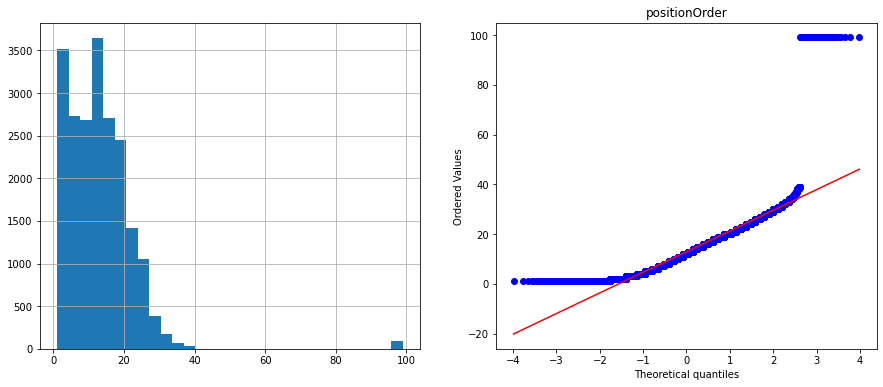

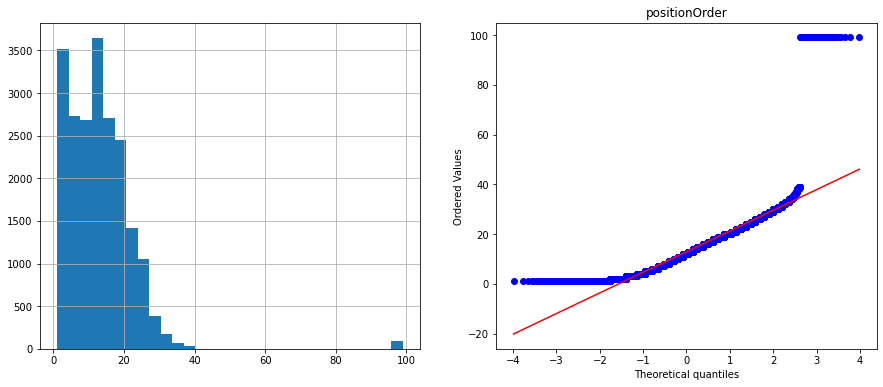

In [137]:
# before distribution
print('Before transformation:')
diagnostic_plots(X_train_cat, 'positionOrder')

#### After Transformation

After transformation:
After transformation:


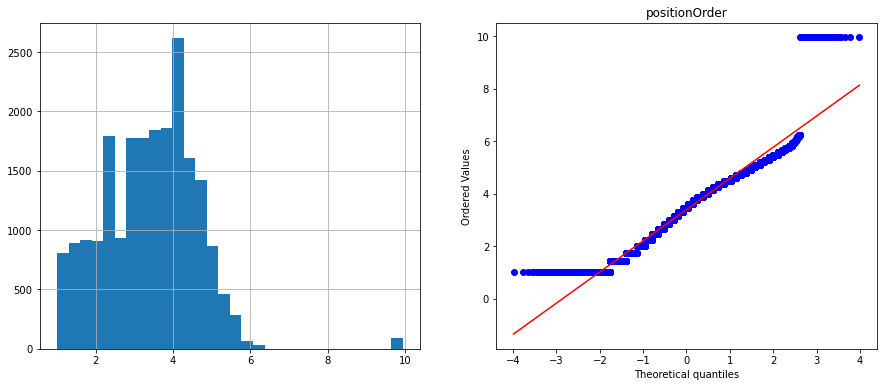

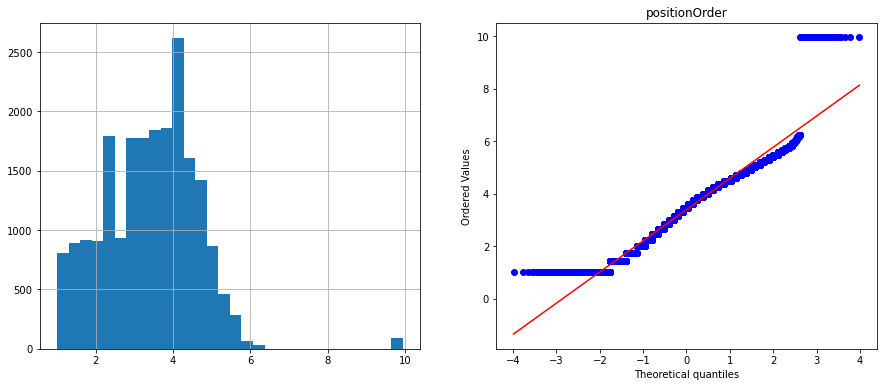

In [138]:
# PowerTransformer
# after distribution
from feature_engine.transformation import PowerTransformer
et = PowerTransformer(variables = ['positionOrder'], exp=1/2)

# fit transformer to data
et.fit(X_train_cat)

X_train_enc = et.transform(X_train_cat)
X_test_enc = et.transform(X_test_cat)

print('After transformation:')
diagnostic_plots(X_train_enc, 'positionOrder')

In [139]:
# yeo johnson for position order

# from feature_engine.transformation import YeoJohnsonTransformer

# # initialize the transformer with a subset of variables to transform
# yjt = YeoJohnsonTransformer(variables = 'positionOrder')

# # fit transformer to the dataframe
# yjt.fit(X_train_cat)

# # transform indicated variables

# X_train_enc = yjt.transform(X_train_cat)
# X_test_enc = yjt.transform(X_test_cat)

# # after distribution 

# diagnostic_plots(X_train_enc, 'positionOrder')

In [140]:
# #log transformer
# # not preferred for fastest lap rank, speed, pitstop (neg values) , position order (not evently distributed)
# from feature_engine.transformation import LogTransformer
# # initialize the transformer
# lt = LogTransformer(variables='positionOrder')

# # fit transformer to data set
# lt.fit(X_train_cat)

# # transform variables within our data set
# X_train_enc = lt.transform(X_train_cat)

# diagnostic_plots(X_train_enc, 'positionOrder')

In [141]:
# #ReciprocalTransformer
# from feature_engine.transformation import ReciprocalTransformer

# # initialize the transformer
# rt = ReciprocalTransformer(variables = 'positionOrder')

# # fit transformer to the entire dataframe
# rt.fit(X_train_cat)

# # transform the indicated variables within our data set
# X_train_enc = rt.transform(X_train_cat)
# X_test_enc = rt.transform(X_test_cat)

# diagnostic_plots(X_train_enc, 'positionOrder')

In [142]:
# # not using data not positive
# from feature_engine.transformation import BoxCoxTransformer

# # initialize the transformer with a group of variables to transform
# bct = BoxCoxTransformer(variables = 'positionOrder')

# # fit transformer to the data set
# bct.fit(X_train_cat)

# # transform the indicated variables in our dataframe
# # returns a new dataframe

# X_train_enc = bct.transform(X_train_cat)
# X_test_enc = bct.transform(X_test_cat)

# # after distribution
# diagnostic_plots(X_train_enc, 'positionOrder')

### 3.5 Variable Discretization  
#### Equal-frequency Discretization  
[Back to top](#top)

In [143]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
disc = EqualFrequencyDiscretiser(
    q=10, variables=['positionOrder', 'fastest_lap_speed'], return_object=True)

disc.fit(X_train_enc)


train_t = disc.transform(X_train_enc)
test_t = disc.transform(X_test_enc)

Text(0, 0.5, 'Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

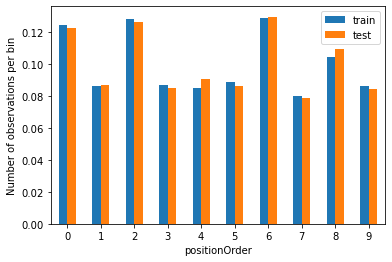

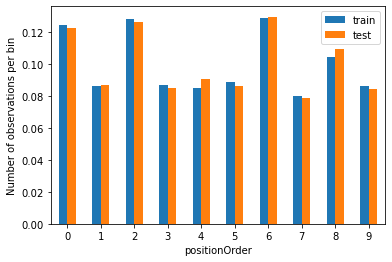

In [144]:
# 'positionOrder'

t1 = train_t.groupby(['positionOrder'])['positionOrder'].count() / len(train_t)
t2 = test_t.groupby(['positionOrder'])['positionOrder'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'mean of points')

Text(0, 0.5, 'mean of points')

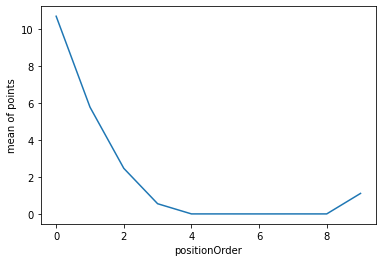

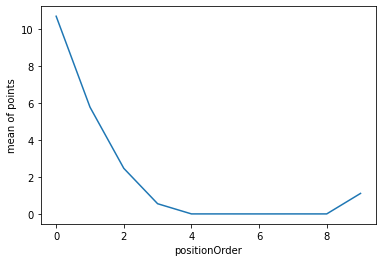

In [145]:
pd.concat([train_t, y_train], axis=1).groupby('positionOrder')['points'].mean().plot()
plt.ylabel('mean of points')

Text(0, 0.5, 'Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

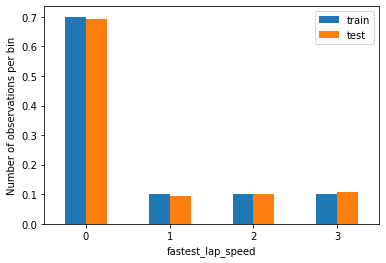

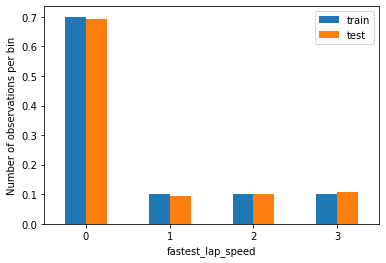

In [146]:
# 'fastest_lap_speed'

t1 = train_t.groupby(['fastest_lap_speed'])['fastest_lap_speed'].count() / len(train_t)
t2 = test_t.groupby(['fastest_lap_speed'])['fastest_lap_speed'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'mean of points')

Text(0, 0.5, 'mean of points')

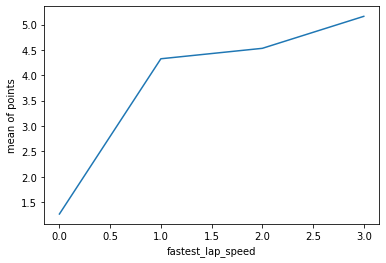

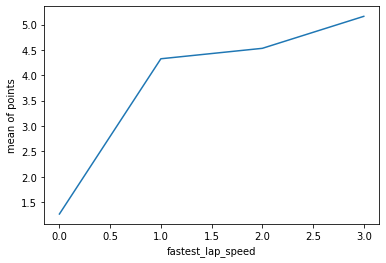

In [147]:
pd.concat([train_t, y_train], axis=1).groupby('fastest_lap_speed')['points'].mean().plot()
plt.ylabel('mean of points')

In [148]:
train_t

,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
11212,0,5,202,70,0,0,0,9,0,0,...,-1.0,0,0,0,1982,0,0,0,0,0
29931,1,22,815,32,1,1,4,6,0,1,...,2.0,1,3,1,2021,0,0,0,0,0
12786,1,1,203,72,1,0,7,2,1,0,...,-1.0,0,0,0,1978,0,0,0,0,0
320,2,16,22,50,2,2,17,5,0,1,...,16.0,1,2,0,2008,0,0,0,0,0
13575,3,12,207,82,3,2,3,9,0,0,...,-1.0,0,0,0,1977,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,3,12,222,72,1,2,7,9,0,0,...,-1.0,0,0,0,1978,0,0,0,0,0
19648,1,1,609,102,0,0,4,3,0,0,...,-1.0,0,0,0,1952,0,0,0,0,0
9845,1,2,105,66,8,0,5,0,1,0,...,-1.0,0,0,0,1985,0,0,0,0,0
10799,0,6,137,70,2,2,4,1,1,0,...,-1.0,0,0,0,1983,0,0,0,0,0


,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
11212,0,5,202,70,0,0,0,9,0,0,...,-1.0,0,0,0,1982,0,0,0,0,0
29931,1,22,815,32,1,1,4,6,0,1,...,2.0,1,3,1,2021,0,0,0,0,0
12786,1,1,203,72,1,0,7,2,1,0,...,-1.0,0,0,0,1978,0,0,0,0,0
320,2,16,22,50,2,2,17,5,0,1,...,16.0,1,2,0,2008,0,0,0,0,0
13575,3,12,207,82,3,2,3,9,0,0,...,-1.0,0,0,0,1977,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,3,12,222,72,1,2,7,9,0,0,...,-1.0,0,0,0,1978,0,0,0,0,0
19648,1,1,609,102,0,0,4,3,0,0,...,-1.0,0,0,0,1952,0,0,0,0,0
9845,1,2,105,66,8,0,5,0,1,0,...,-1.0,0,0,0,1985,0,0,0,0,0
10799,0,6,137,70,2,2,4,1,1,0,...,-1.0,0,0,0,1983,0,0,0,0,0


In [149]:
# from feature_engine.discretisation import EqualWidthDiscretiser

# disc = EqualWidthDiscretiser(bins=10, variables = ['positionOrder'])

# disc.fit(X_train_enc)

# train_t = disc.transform(X_train_enc)
# test_t = disc.transform(X_test_enc)

# # 'pitstop lap'
# # calculate proportion of observations per interval
# t1 = train_t.groupby(['positionOrder'])['positionOrder'].count() / len(train_t)
# t2 = test_t.groupby(['positionOrder'])['positionOrder'].count() / len(test_t)

# # concatenate aggregated views
# tmp = pd.concat([t1, t2], axis=1)
# tmp.columns = ['train', 'test']

# # plot
# tmp.plot.bar()
# plt.xticks(rotation=0)
# plt.ylabel('Number of observations per bin')

In [150]:
# from feature_engine.discretisation import EqualWidthDiscretiser

# disc = EqualWidthDiscretiser(bins=10, variables = ['fastest_lap_speed'])

# disc.fit(X_train_enc)

# train_t = disc.transform(X_train_enc)
# test_t = disc.transform(X_test_enc)

# # 'pitstop lap'
# # calculate proportion of observations per interval
# t1 = train_t.groupby(['fastest_lap_speed'])['fastest_lap_speed'].count() / len(train_t)
# t2 = test_t.groupby(['fastest_lap_speed'])['fastest_lap_speed'].count() / len(test_t)

# # concatenate aggregated views
# tmp = pd.concat([t1, t2], axis=1)
# tmp.columns = ['train', 'test']

# # plot
# tmp.plot.bar()
# plt.xticks(rotation=0)
# plt.ylabel('Number of observations per bin')

### 3.6 Feature scaling
#### Standardization 
[Back to top](#top)

In [151]:
# standardisation: with the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_t)

# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)

# transform the returned NumPy arrays to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

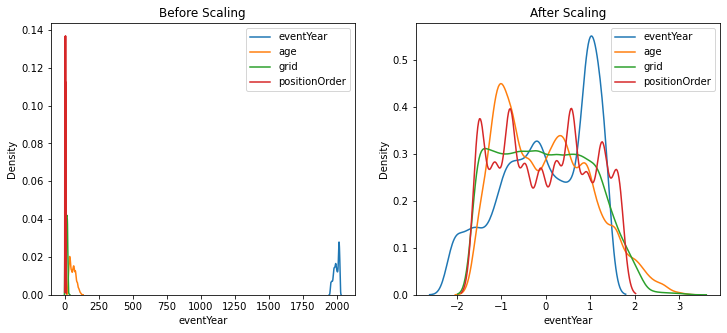

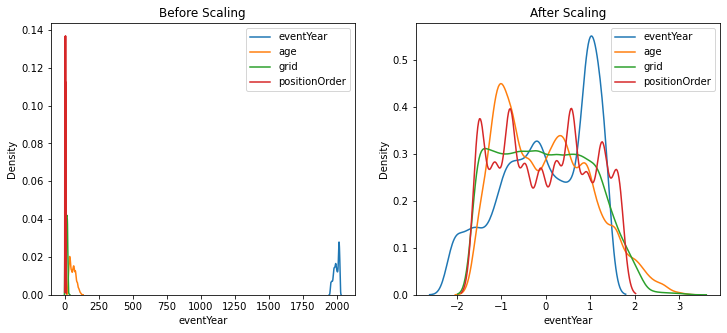

In [152]:
# compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(train_t['eventYear'], ax=ax1, label ='eventYear')
sns.kdeplot(train_t['age'], ax=ax1, label ='age')
sns.kdeplot(train_t['grid'], ax=ax1, label ='grid')
sns.kdeplot(train_t['positionOrder'], ax=ax1, label ='positionOrder')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['eventYear'], ax=ax2, label ='eventYear')
sns.kdeplot(X_train_scaled['age'], ax=ax2, label ='age')
sns.kdeplot(X_train_scaled['grid'], ax=ax2, label ='grid')
sns.kdeplot(X_train_scaled['positionOrder'], ax=ax2, label ='positionOrder')
ax2.legend()
plt.show()

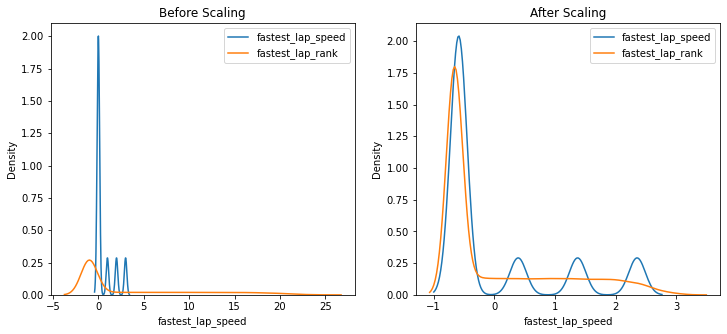

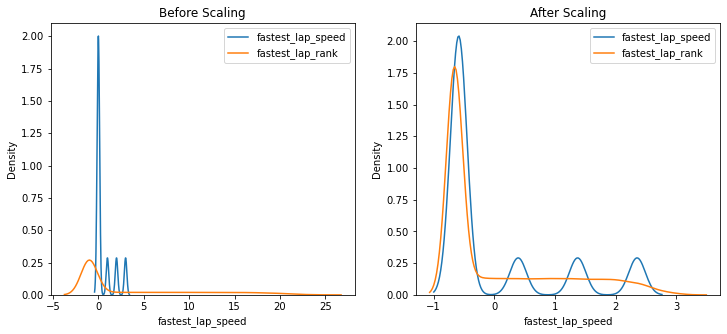

In [153]:
# compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(train_t['fastest_lap_speed'], ax=ax1, label ='fastest_lap_speed')
sns.kdeplot(train_t['fastest_lap_rank'], ax=ax1, label ='fastest_lap_rank')

ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['fastest_lap_speed'], ax=ax2, label ='fastest_lap_speed')
sns.kdeplot(X_train_scaled['fastest_lap_rank'], ax=ax2, label ='fastest_lap_rank')

ax2.legend()
plt.show()

In [154]:
X_train_scaled

,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
0,-1.195270,-0.697167,-0.288658,0.537824,-1.312147,-1.415268,-1.570553,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.584937,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
1,-0.971749,2.640088,1.776532,-1.174752,-0.977222,-0.890570,-1.009342,0.574187,-0.665644,1.110324,...,-0.208003,1.271390,2.353250,1.543733,1.386235,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
2,-0.971749,-1.482403,-0.285289,0.627960,-0.977222,-1.415268,-0.588434,-0.804928,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.787109,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
3,-0.748228,1.462233,-0.895076,-0.363532,-0.642296,-0.365873,0.814592,0.229408,-0.665644,1.110324,...,1.887670,1.271390,1.372709,-0.647780,0.729178,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
4,-0.524707,0.676997,-0.271813,1.078637,-0.307371,-0.365873,-1.149645,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.837652,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20950,-0.524707,0.676997,-0.221278,0.627960,-0.977222,-0.365873,-0.588434,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.787109,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
20951,-0.971749,-1.482403,1.082520,1.979993,-1.312147,-1.415268,-1.009342,-0.460149,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-2.101224,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
20952,-0.971749,-1.286094,-0.615450,0.357553,1.367257,-1.415268,-0.869040,-1.494485,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.433308,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
20953,-1.195270,-0.500858,-0.507642,0.537824,-0.642296,-0.365873,-1.009342,-1.149706,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.534394,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539


,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
0,-1.195270,-0.697167,-0.288658,0.537824,-1.312147,-1.415268,-1.570553,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.584937,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
1,-0.971749,2.640088,1.776532,-1.174752,-0.977222,-0.890570,-1.009342,0.574187,-0.665644,1.110324,...,-0.208003,1.271390,2.353250,1.543733,1.386235,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
2,-0.971749,-1.482403,-0.285289,0.627960,-0.977222,-1.415268,-0.588434,-0.804928,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.787109,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
3,-0.748228,1.462233,-0.895076,-0.363532,-0.642296,-0.365873,0.814592,0.229408,-0.665644,1.110324,...,1.887670,1.271390,1.372709,-0.647780,0.729178,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
4,-0.524707,0.676997,-0.271813,1.078637,-0.307371,-0.365873,-1.149645,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.837652,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20950,-0.524707,0.676997,-0.221278,0.627960,-0.977222,-0.365873,-0.588434,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.787109,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
20951,-0.971749,-1.482403,1.082520,1.979993,-1.312147,-1.415268,-1.009342,-0.460149,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-2.101224,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
20952,-0.971749,-1.286094,-0.615450,0.357553,1.367257,-1.415268,-0.869040,-1.494485,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.433308,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
20953,-1.195270,-0.500858,-0.507642,0.537824,-0.642296,-0.365873,-1.009342,-1.149706,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.534394,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539


In [155]:
# # mean normalising
# means = train_t.mean(axis=0)
# ranges = train_t.max(axis=0)-train_t.min(axis=0)

# X_train_scaled =(train_t - means)/ranges
# X_test_scaled = (test_t - means)/ranges

# X_train_scaled.head()

In [156]:
# # the scaler - for MaxAbsScaling, with centering
# from sklearn.preprocessing import MaxAbsScaler

# # set up the scaler
# scaler = MaxAbsScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(train_t)

# # transform train and test sets
# X_train_scaled = scaler.transform(train_t)
# X_test_scaled = scaler.transform(test_t)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

In [157]:
# # the scaler - for min-max scaling
# from sklearn.preprocessing import MinMaxScaler

# # set up the scaler
# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(train_t)

# # transform train and test sets
# X_train_scaled = scaler.transform(train_t)
# X_test_scaled = scaler.transform(test_t)

# # let's transform the returned NumPy arrays to dataframes
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

In [158]:
# # the scaler - for robust scaling
# from sklearn.preprocessing import RobustScaler

# # set up the scaler
# scaler = RobustScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(train_t)

# # transform train and test sets
# X_train_scaled = scaler.transform(train_t)
# X_test_scaled = scaler.transform(test_t)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

<AxesSubplot:>

<AxesSubplot:>

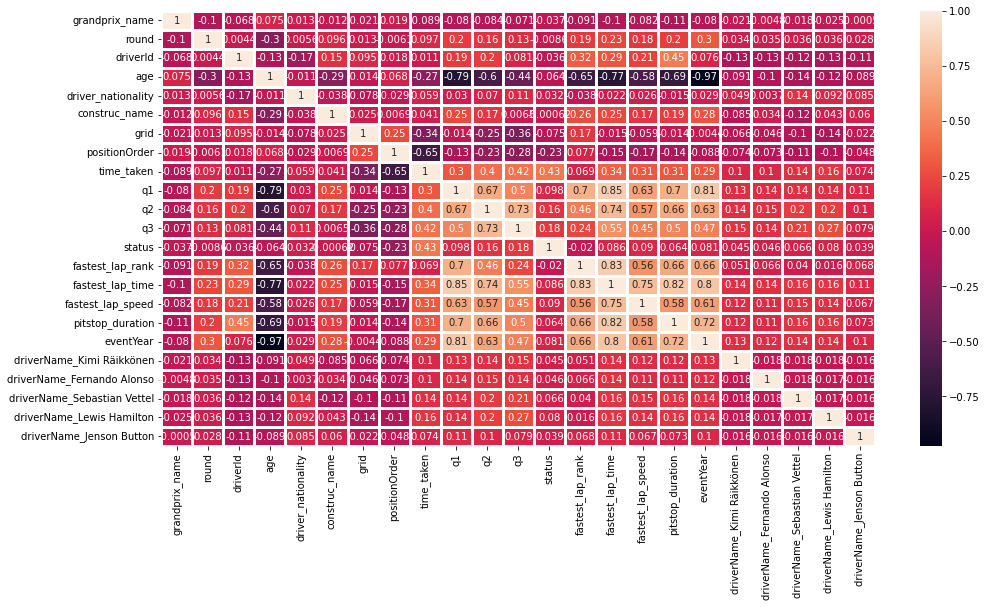

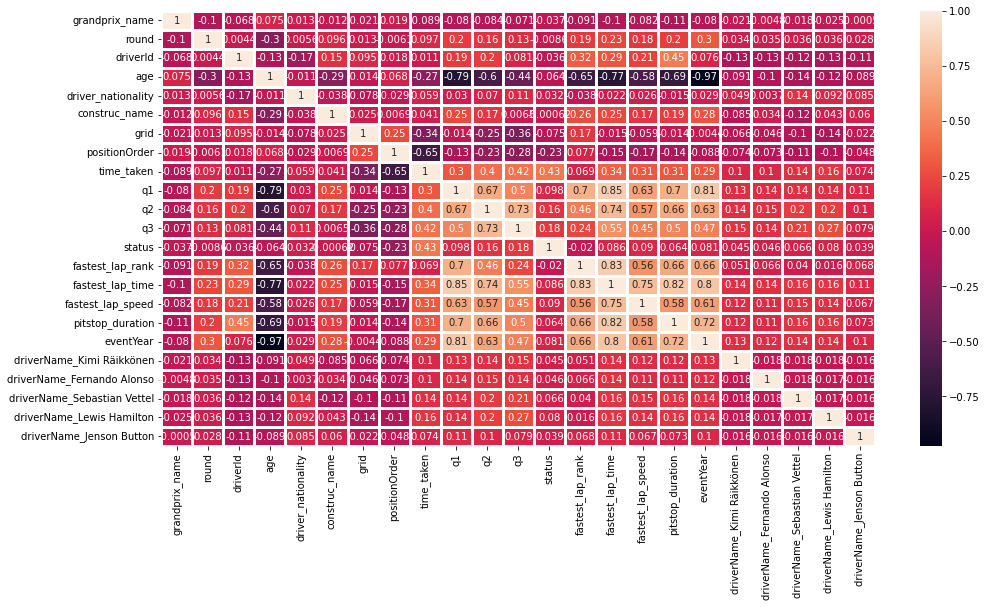

In [159]:
# heatmap on final 'X_train_scaled'
plt.figure(figsize=(16,8))
sns.heatmap(X_train_scaled.corr(), annot=True, linewidths=3.0)

## Step 4: Machine Learning Modelling
#### Count of rows and columns  
[Back to top](#top)

In [160]:
print('train: rows & columns {}'. format(X_train_scaled.shape))
print('test: rows & columns {}'. format(X_test_scaled.shape))

train: rows & columns (20955, 23)
test: rows & columns (8981, 23)
train: rows & columns (20955, 23)
test: rows & columns (8981, 23)


In [161]:
print(X_train_scaled.shape)
print(type(X_train_scaled))
X_train_scaled[0:5]

(20955, 23)
<class 'pandas.core.frame.DataFrame'>
(20955, 23)
<class 'pandas.core.frame.DataFrame'>


,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
0,-1.195270,-0.697167,-0.288658,0.537824,-1.312147,-1.415268,-1.570553,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.584937,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
1,-0.971749,2.640088,1.776532,-1.174752,-0.977222,-0.890570,-1.009342,0.574187,-0.665644,1.110324,...,-0.208003,1.271390,2.353250,1.543733,1.386235,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
2,-0.971749,-1.482403,-0.285289,0.627960,-0.977222,-1.415268,-0.588434,-0.804928,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.787109,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
3,-0.748228,1.462233,-0.895076,-0.363532,-0.642296,-0.365873,0.814592,0.229408,-0.665644,1.110324,...,1.887670,1.271390,1.372709,-0.647780,0.729178,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
4,-0.524707,0.676997,-0.271813,1.078637,-0.307371,-0.365873,-1.149645,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.837652,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539


,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
0,-1.195270,-0.697167,-0.288658,0.537824,-1.312147,-1.415268,-1.570553,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.584937,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
1,-0.971749,2.640088,1.776532,-1.174752,-0.977222,-0.890570,-1.009342,0.574187,-0.665644,1.110324,...,-0.208003,1.271390,2.353250,1.543733,1.386235,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
2,-0.971749,-1.482403,-0.285289,0.627960,-0.977222,-1.415268,-0.588434,-0.804928,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.787109,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
3,-0.748228,1.462233,-0.895076,-0.363532,-0.642296,-0.365873,0.814592,0.229408,-0.665644,1.110324,...,1.887670,1.271390,1.372709,-0.647780,0.729178,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
4,-0.524707,0.676997,-0.271813,1.078637,-0.307371,-0.365873,-1.149645,1.608523,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.837652,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539


In [162]:
print(X_test_scaled.shape)
print(type(X_test_scaled))
X_test_scaled[0:5]

(8981, 23)
<class 'pandas.core.frame.DataFrame'>


,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
0,-0.524707,-0.304548,0.331236,1.529315,-0.307371,-0.365873,-0.869040,-1.494485,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-1.494709,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
1,1.263463,-0.697167,1.786639,-1.174752,-1.312147,2.257613,0.113079,1.263744,-0.665644,1.110324,...,2.037361,1.271390,0.392169,1.543733,0.981892,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
2,1.039941,2.247470,-0.952348,-0.769142,0.362480,-0.365873,1.235500,0.229408,-0.665644,1.110324,...,0.989525,1.271390,0.392169,1.543733,0.931349,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
3,-0.971749,1.265924,-0.443631,0.357553,0.697406,-0.365873,0.954895,-0.460149,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.382766,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
4,0.592899,-0.500858,0.166156,0.943434,-0.977222,-0.365873,-0.728737,1.263744,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-1.090366,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539


(8981, 23)
<class 'pandas.core.frame.DataFrame'>


,grandprix_name,round,driverId,age,driver_nationality,construc_name,grid,positionOrder,time_taken,q1,...,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,pitstop_duration,eventYear,driverName_Kimi Räikkönen,driverName_Fernando Alonso,driverName_Sebastian Vettel,driverName_Lewis Hamilton,driverName_Jenson Button
0,-0.524707,-0.304548,0.331236,1.529315,-0.307371,-0.365873,-0.869040,-1.494485,1.502304,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-1.494709,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
1,1.263463,-0.697167,1.786639,-1.174752,-1.312147,2.257613,0.113079,1.263744,-0.665644,1.110324,...,2.037361,1.271390,0.392169,1.543733,0.981892,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
2,1.039941,2.247470,-0.952348,-0.769142,0.362480,-0.365873,1.235500,0.229408,-0.665644,1.110324,...,0.989525,1.271390,0.392169,1.543733,0.931349,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
3,-0.971749,1.265924,-0.443631,0.357553,0.697406,-0.365873,0.954895,-0.460149,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-0.382766,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539
4,0.592899,-0.500858,0.166156,0.943434,-0.977222,-0.365873,-0.728737,1.263744,-0.665644,-0.900638,...,-0.657076,-0.786541,-0.588371,-0.647780,-1.090366,-0.134252,-0.132771,-0.132212,-0.131463,-0.122539


### 4.2 Machine Learning Model
#### Naïve baseline  
[Back to top](#top)

In [163]:
import numpy as np
from scipy import stats

# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

2.288916726318301
The train mean target value is 2.29.
2.288916726318301
The train mean target value is 2.29.


In [164]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_scaled.iloc[:,0]]
y_train_preds_naive[0:5]

[2.29, 2.29, 2.29, 2.29, 2.29]

[2.29, 2.29, 2.29, 2.29, 2.29]

In [165]:
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_scaled.iloc[:,0]]
y_test_preds_naive[0:5]

[2.29, 2.29, 2.29, 2.29, 2.29]

[2.29, 2.29, 2.29, 2.29, 2.29]

In [166]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 22.98.
The Naive Baseline Model's MSE on train data is 22.98.
The Naive Baseline Model's MSE on test data is 22.77.

The Naive Baseline Model's RMSE on train data is 4.79.
The Naive Baseline Model's RMSE on test data is 4.77.

The Naive Baseline Model's MSE on test data is 22.77.

The Naive Baseline Model's RMSE on train data is 4.79.
The Naive Baseline Model's RMSE on test data is 4.77.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.
The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


#### Linear Regression  
[Back to top](#top)

In [167]:
linreg_ss = LinearRegression().fit(X_train_scaled, y_train)

y_train_preds_linreg_ss = linreg_ss.predict(X_train_scaled)
y_test_preds_linreg_ss = linreg_ss.predict(X_test_scaled)

In [168]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_mse_linreg_ss = mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's MSE on train data is {train_mse_linreg_ss:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_mse_linreg_ss = mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's MSE on test data is {test_mse_linreg_ss:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_rmse_linreg_ss = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinRegSS Model's RMSE on train data is {train_rmse_linreg_ss:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_rmse_linreg_ss = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinRegSS Model's RMSE on test data is {test_rmse_linreg_ss:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_r2_linreg_ss = r2_score(y_true, y_pred)
print(f"The LinRegSS Model's R2 on train data is {train_r2_linreg_ss:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_r2_linreg_ss = r2_score(y_true, y_pred)
print(f"The LinRegSS Model's R2 on test data is {test_r2_linreg_ss:.2f}.")


The LinRegSS Model's MSE on train data is 7.8155.
The LinRegSS Model's MSE on test data is 7.8576.

The LinRegSS Model's RMSE on train data is 2.7956.
The LinRegSS Model's RMSE on test data is 2.8031.

The LinRegSS Model's R2 on train data is 0.66.
The LinRegSS Model's R2 on test data is 0.65.
The LinRegSS Model's MSE on train data is 7.8155.
The LinRegSS Model's MSE on test data is 7.8576.

The LinRegSS Model's RMSE on train data is 2.7956.
The LinRegSS Model's RMSE on test data is 2.8031.

The LinRegSS Model's R2 on train data is 0.66.
The LinRegSS Model's R2 on test data is 0.65.


<a id="bottom"></a>
## Report
### Table of Contents
#### 1. [Introduction with Value Based Problem Statement](#part1)
   - [1.1 Background](#part1.1)
  
  
#### 2. [Problem Formulation](#part2)
  - [2.1 Load and Explore the Data](#part2.1)
  - [2.2 Understand the Data](#part2.2)
  - [2.3 Formulate a Prediction Problem](#part2.3)
      
  
#### 3. [Data Wrangling on multiple tables](#part3)
   - [3.1 Concatenate, Merge or Join the tables](#part3.1)
   - [3.2 Extract and Create features from different tables](#part3.2)
  

#### 4. [Data Cleansing and Transformation](#part4)
   - [4.1 Outliers](#part4.1)
   - [4.2 Train and Test Split](#part4.2)
   - [4.3 Missing Value Imputation](#part4.3)
   - [4.4 Categorical Data](#part4.4)
   - [4.5 Numerical Data](#part4.5)
   - [4.6 Equal-frequency Discretization](#part4.6)      
   - [4.7 Feature scaling](#part4.7)
   
#### 5. [Machine Learning Model](#part5)
   - [5.1 Show Count of Rows and Columns](#part5.1)
   - [5.2 Naïve Baseline Model (for Regression)](#part5.2)
   - [5.3 Linear Regression Model](#part5.3)

   
#### 6. [Summary and Further Improvements](#part6)
   - [6.1 Summarize Findings](#part6.1)
   - [6.2 Possible Further Improvements](#part6.2)

[Back to top (code)](#top)

# 1. Introduction with Value Based Problem Statement <a id="part1"></a>
### 1.1 Background <a id="part1.1"></a>
Machine Learning for Formula 1 is commonly used to deliver in-race predictions to its fans. By using distinct data points to inform each insight, the predictions enable F1 fans to understand the split seconds decisions made by the drivers and the race strategies that teams have implemented in real time that could impact the outcome of a race.

This dataset is adapted from Ergast.com, a webservice that provides a database of Formula 1 races. The dataset includes Formula 1 races from 1950 till today. It contains information about all Formula 1 races, including lap times, pit stops and performance in the qualifying rounds etc.

I am tasked to gain an insight of the 13 'f1_db_csv' files with a data dictionary provided with detailed description for all the 13 tables. After analysis of the dataset, useful tables will be extracted to solve a prediction problem. Merging of multiple tables is conducted to create a tabular data table. The final tabular data table will be wrangled to build a machine learning model for analysis purpose.

# 2. Problem Formulation <a id="part2"></a>
### 2.1 Load and Explore the Data <a id="part2.1"></a>

Given the 13 'f1_db_csv' files/tables, 7 csv files/tables will be utilized that consist of 'results', 'races', 'drivers', 'pit_stops', 'constructors', qualifying as 'quali' and status as 'stat. The final tabular data table will consist of all the 7 csv files/tables. 

Steps taken for exploration of data are as follows:

- A backup copy 'f1_race_bkup' is created in the DataFrame. The. copy() method helps to retain the original dataframe which will be useful in the event if any error occurred in the dataset.  


- To display the first 5 records of the dataset, .head() method is used.


- To view the number of items and data type of each columns, .info() method is used. The dataset comprises of 1 excel sheet with 29936 rows and 33 columns. It consists of various data types which are integer, float and object. The state of the data is considered not clean with some null values. The columns that have null values are 'date', 'lap', 'duration', 'q1', 'q2' and 'q3'. These columns will be imputed in the missing values in the missing value imputation section. The df.info() also shows that from the 12 features, there are 11 numeric and 22 categorical variables.



### 2.2 Understand the Data <a id="part2.2"></a>

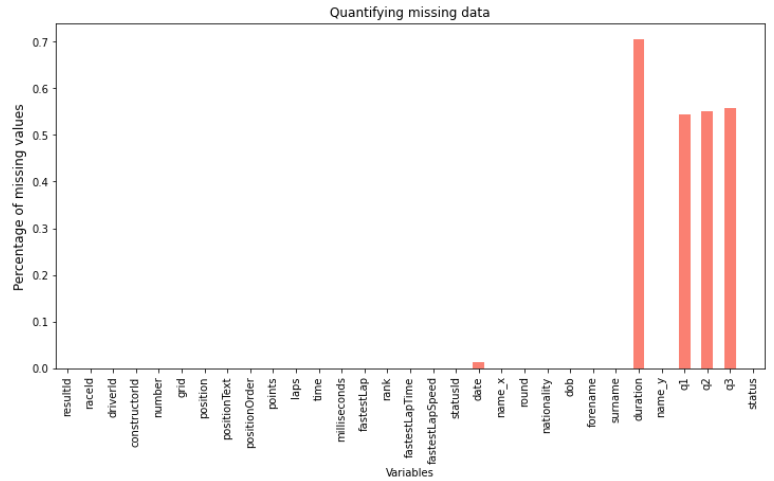

Bar chart is plotted to visualise the percentage of missing values. It can be observed that 'duration' has the highest percentage of missing values and 'date' with the least percentage of missing values. 

Imputation technique will be used subsequently to replace these missing data with a substitute value. This method is preferred as compared to removal of the 'NaNs' immediately as it helps to retain most of the information of the dataset. Removing the 'NaNs' is impractical as it reduces the dataset's size and it might lead to biasness in analysis.        

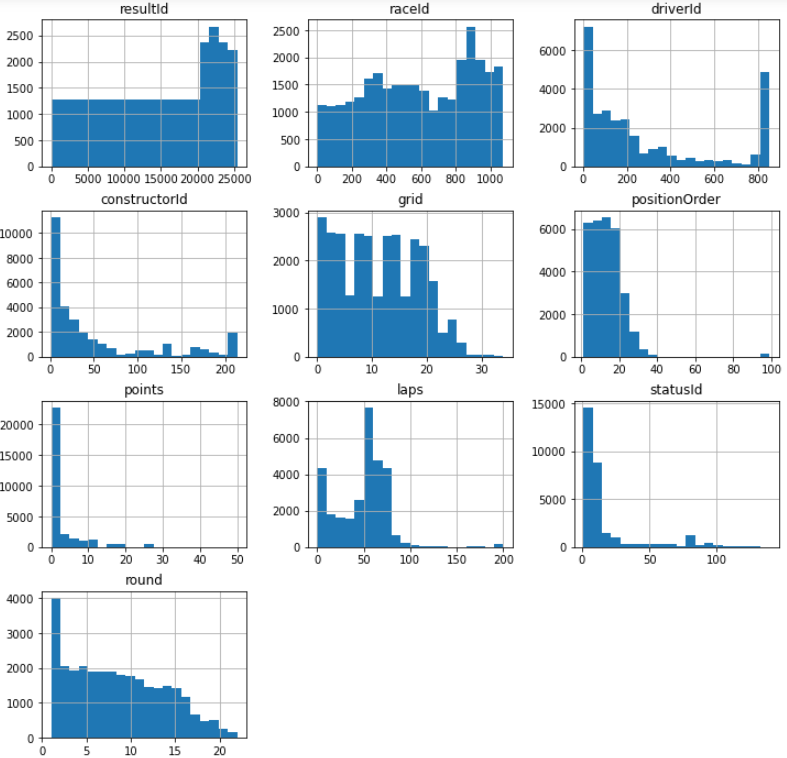

Histogram is used to show the distribution of all numerical features. It can be observed that all numerical features do not have a normal distribution.

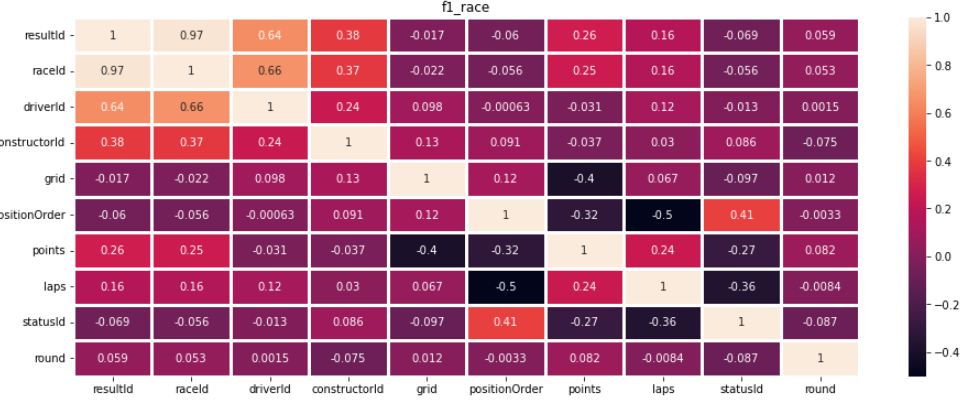

A heatmap is used to show the correlation among numerical features of the F1 dataset. It shows that 'raceId' is highly correlated among the rest of the features with 'resultId'.



### 2.3 Formulate a Prediction Problem <a id="part2.3"></a>

My prediction problem is to provide a prediction on the possible factors that could affect the chances of winning Formula 1. 

Some of the areas that I would like to explore would be:

- Age: it is an important factor for team decision. Younger driver is perceived to be sharp and skilful and there could be an age range where F1 drivers reach their peak.


- Hot streaks: with the momentum of past victories, some drivers may have a higher chance to win if they have won in the last few races.


- Pit stop: estimation of the number of pits stops per race and its impact on performance based on past records. 


- Qualifying format: a further insight on performance could be obtained based on the races that determine the start position of the actual races.


- Lap times: the average or maximum lap times could provide insights for race performance.


- Grand prix location: the grand prix of race would provide home field advantage to drivers if he is trained in the same place as the race.

# 3. Data Wrangling on multiple tables <a id="part3"></a>

### 3.1 Concatenate, Merge or Join the tables <a id="part3.1"></a>
The final tabular data table was formulated using a 'left' merge on all the 7 tables. 'Merge' was preferred over 'Join' as it is more versatile and allows us to define columns besides the index to join on for both dataframes.

'Left' merge was done on the 'results' and 'races' tables on selected features such as 'raceId', 'date', 'name' and 'round' on its common feature, 'raceId'.

Another merge was used to combine the previous merged dataframe together with 'drivers' table, 'driversId', 'nationality', 'dob', 'forename' and 'surname' on its 'driverId'. A new feature 'driverName' will be created subsequently using the 'forename' and 'surname' to identify the driver.

Next, using the previous merged dataframe to merge 'pit_stops' table, 'raceId', 'driverId' and 'duration' on its 'driverId' and 'raceId'. The 'duration' feature represents the time taken of the pit stop which would be useful in my analysis.

In addition, using the previous merged dataframe to merge 'constructors' table, 'constructorId' and 'name' on its 'constructorId'.

Furthermore, the previous merged dataframe is merged with 'quali' table, 'raceId', 'driverId', 'constructorId', 'q1', 'q2', 'q3' on 'raceId', 'driverId' and 'constructorId'.

The last merge is done using the previous merged dataframe with 'stat' table, 'statusId' and 'status' on 'statusId'. 

### 3.2 Extract and Create features from different tables <a id="part3.2"></a>

A new feature, 'age' is added to determine the driver's age. The following steps to derive the 'age' are as follows:

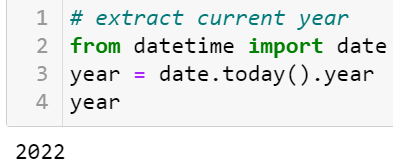

Using pandas library to import date and 'date.today().year' to extract the current year. It will be assigned to a variable 'year'.

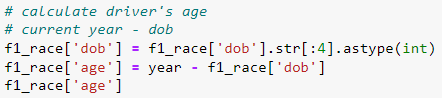

To extract the last 4 digits of the year in 'dob', I use indexing '[:4]' and change the data type into 'int' format on the f1_race['dob']. The formula can be derived from subtracting the f1_race['dob'] from the 'year'.

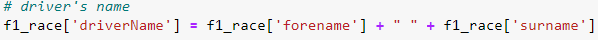

The new feature 'driver_name' can be derived using concatenation of 'forename' + ' ' + 'surname'. 
Having driver's name is important as it is used for identification purpose.

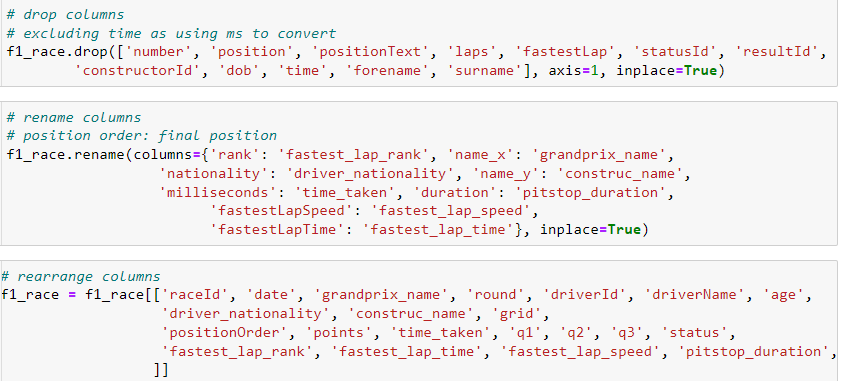

The above images show the removal of unnecessary column that are not useful, rename of columns that would be used and rearragement of those renamed columns. 

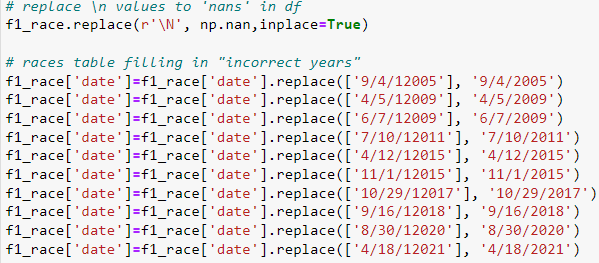

The steps taken to cleanse the data are as follows:
All the '\N' are replaced to 'NaNs' to represent the missing values in the dataframe. 

During exploration of the dataset, it can be observed that the 'date' feature under 'race' table has incorrect format of years and blanks are shown. I filter the 'date' feature to have a better understanding of the dataset. Hence, .replace method is used to replace the incorrect format of years to its respective years as shown above. 

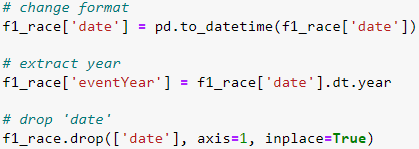

The 'date' feature can be converted to a datetime format after replacing the respective years to the correct format. Next, to extract the year from the 'date', a new variable 'eventYear' is created using .dt.year. The 'date' will be dropped as it is unnecessary.

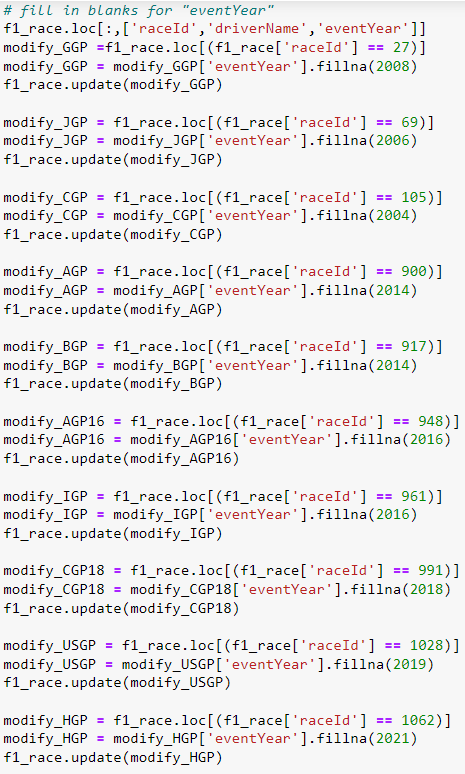

The blanks shown in the 'date' feature under 'race' table will be filled with the correct year format based on the URL provided in the excel. The f1.race.loc is used to locate the 'raceId', 'driverName' and 'eventYear'.  The corresponding 'raceId' of the 'eventYear' with blanks are replaced with the correct year format and updated in the dataframe.

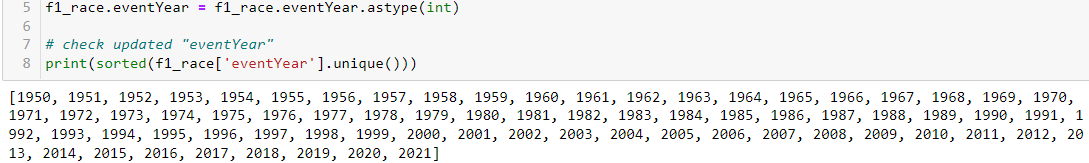

The feature, 'eventYear' is modified into integer format and the unique values of 'eventYear' that are sorted in ascending order will be displayed. This is to ensure that the 'eventYear' will be presented in the correct format.

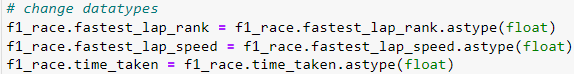

The default object data type of 'fastest_lap_rank', 'fastest_lap_speed' and 'time_taken' are modified into float format.

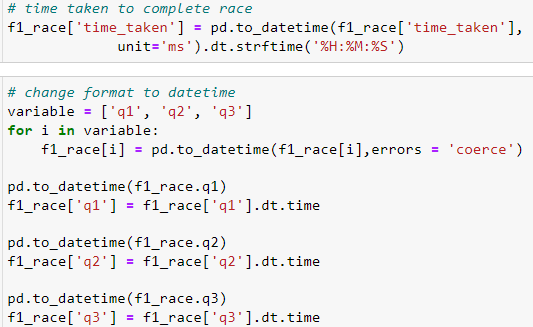

The 'time_taken' feature is modified into datetime format in milliseconds and displayed in the format of '%H:%M:%S'.
In addition, 'q1', 'q2', and 'q3' are converted to datetime format and extracted using .dt.time.

# 4. Data Cleansing and Transformation <a id="part4"></a>
### 4.1 Outliers<a id="part4.1"></a>

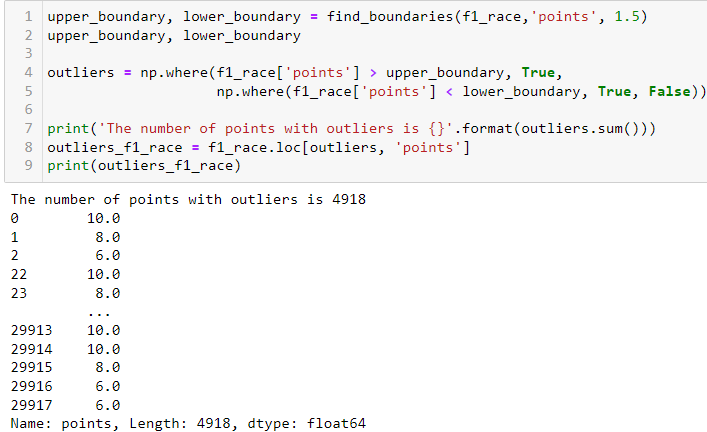

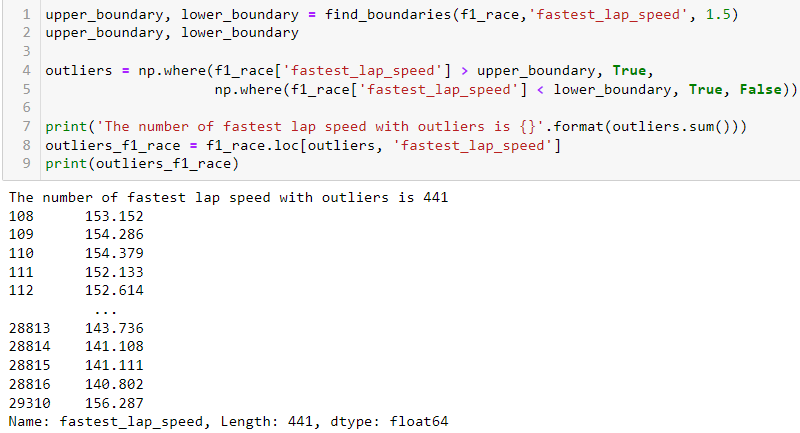

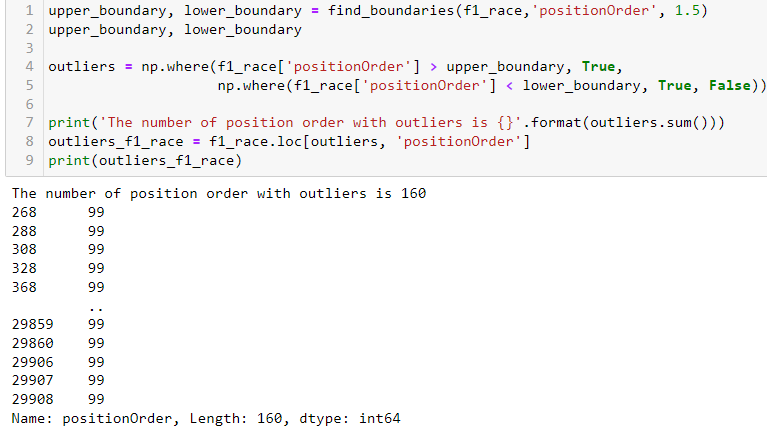

In this phase, I check for any outliers present in the numerical variable columns.
Outliers are only present in 'points', 'fastest_lap_speed' and 'positionOrder'. As these outliers represent natural variations in the data, thus, dealing with these outliers is unnecessary.

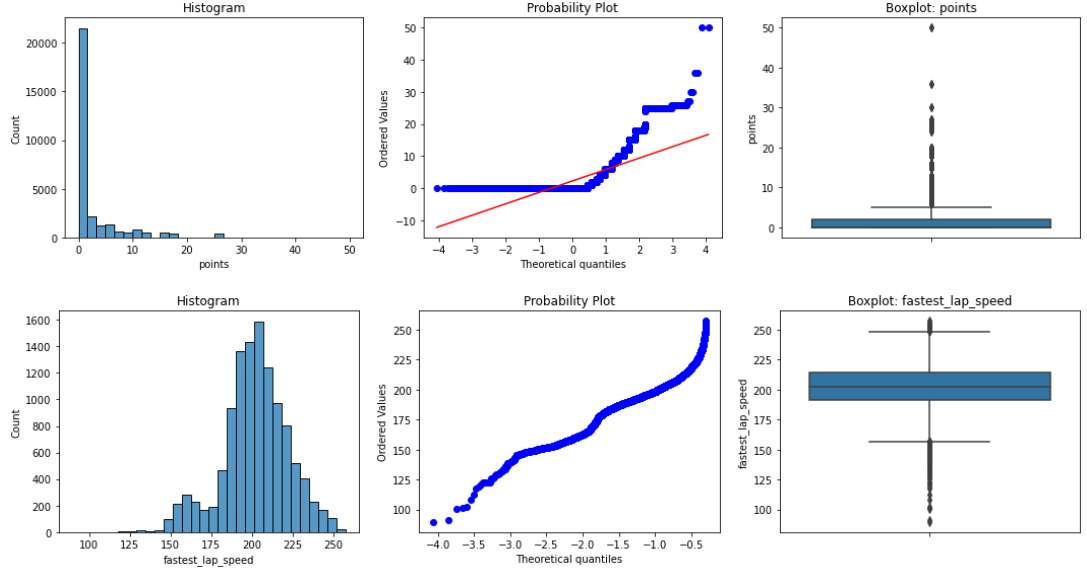

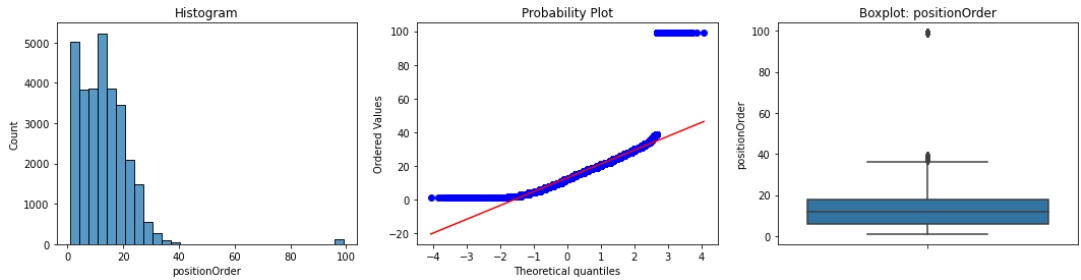 

The above images show the distribution of the three features, 'points', 'fastest_lap_speed' and 'positionOrder' using a histogram, QQ-plot and Box Plots. It can be observed that all the three features are not evenly distributed.

### 4.2 Train and Test Split <a id="part4.2"></a>

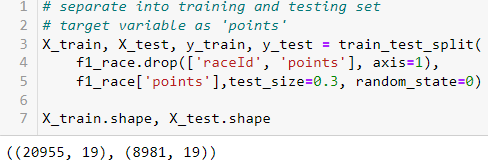

For my Train and Test Split, the ratio is 70% and 30% for training and testing data respectively.
The 'raceId' represents that each race has a unique identifier. This feature is dropped as it is not useful with respect to the factors that are determined in my prediction on the win rate of the Formula 1. The feature, 'points' is dropped as it is a target variable.

###  4.3 Missing Values Imputation <a id="part4.3"></a>
#### Numerical Data <a id="part4.3.1"></a>
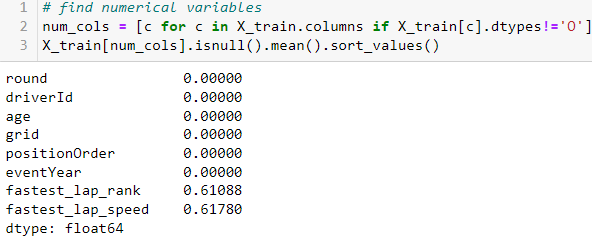

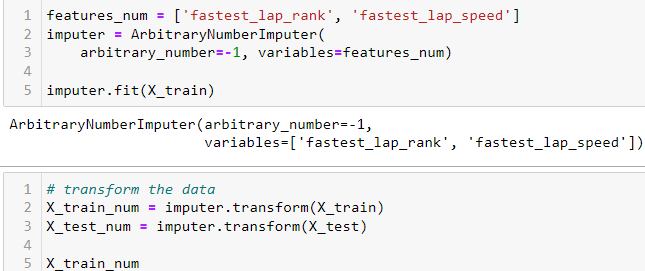

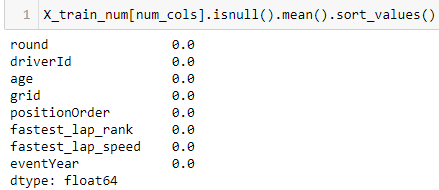

The attributes 'fastest_lap_rank' and 'fastest_lap_speed' have missing values as can be seen using X_train[num_cols].isnull().mean().sort_values().

I impute these missing numerical features values using the arbituary imputation with -1. This means that all the missing values features of 'fastest_lap_rank' and 'fastest_lap_speed' will be represented as -1 instead of NaN.

As the original variable distribution is likely distorted, this method is used as the percentage of missing data is high and the data is not missing at random.

The subsequent results show that there are no more null values.

#### Categorical Data <a id="part4.3.2"></a>
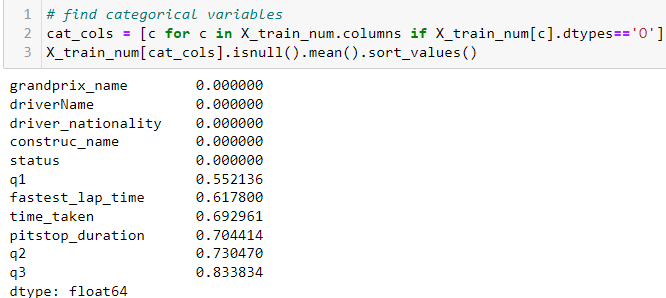

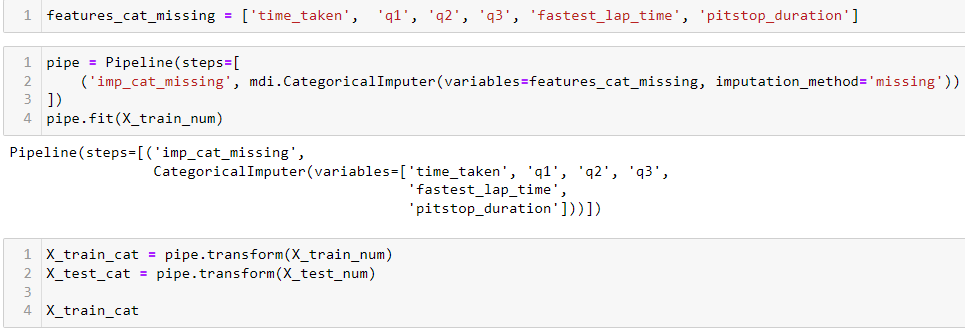

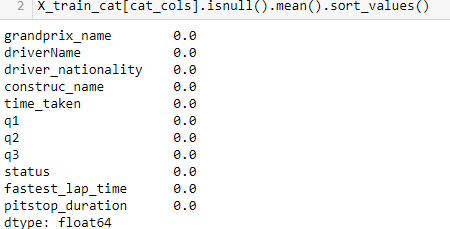

Similar approach as the numerical features using X_train[cat_cols].isnull().mean().sort_values() to locate the missing values. The features with missing values are 'q1', 'fastest_lap_time', 'time_taken', 'pitstop_duration', 'q2' and 'q3'. 

These missing categorical features values are imputed using the arbitrary imputation with 'missing'. 

The subsequent results show that there are no more null values.

### 4.4 Categorical data <a id="part4.4"></a>

#### One Hot Encoding with Top Categories <a id="part4.4.1"></a>

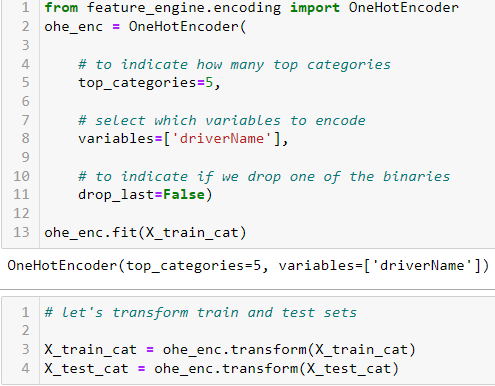
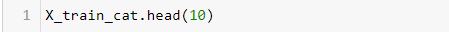
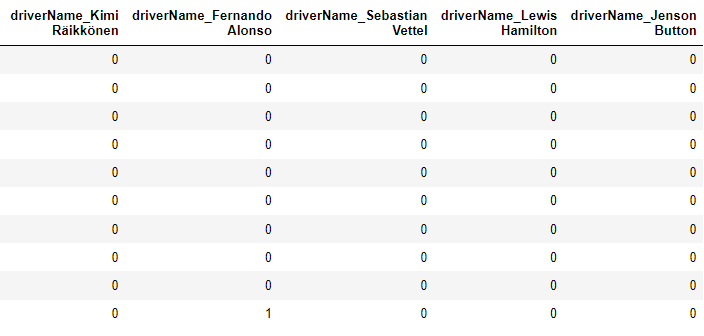

As one-hot encoding of highly cardinal variables can expand the feature space, one-hot encoding of frequent categories is performed. This method helps to reduce the number of binary variables as compared to one-hot encoding. 

The feature, 'driverName' is used for this encoding method and only the top 5 most frequent labels will be stored. It can be observed that driver name: Kimi Räikkönen, Fernando Alonso, Sebastian Vettel, Lewis Hamilton and Jenson Button are displayed as the most frequent labels.

#### Rare Encoding <a id="part4.4.2"></a>
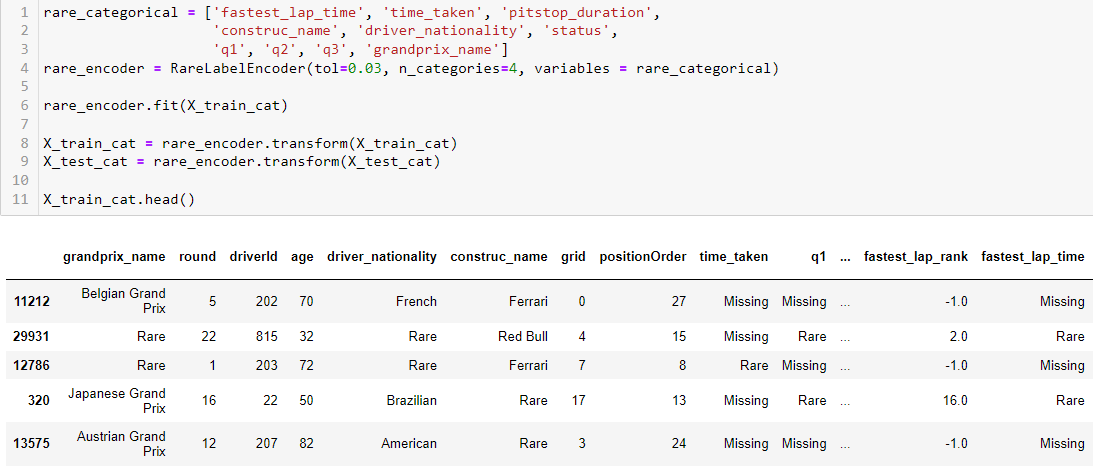

Rare encoding is conducted for most of the features such as 'fastest_lap_time', 'time_taken', 'pitstop_duration', 'construc_name', 'driver_nationality', 'status', 'q1', 'q2', 'q3' and 'grandprix_name'. This method is used to group infrequent categories into a new label as 'Rare'. 

#### Count/frequency Encoding <a id="part4.4.3"></a>
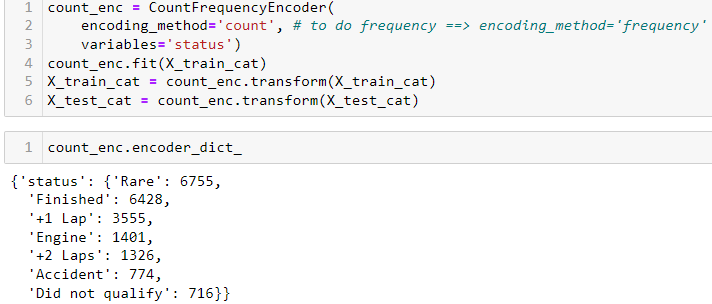
The feature, 'status' has various types of attributes, therefore count encoding is preferred as compared to label encoding. This preferred encoding method will replace the categories with the count based on 'status'.

Count encoding displays additional information such as the frequency of occurrence of the attributes while label encoding shows the index of the label. 

#### Ordinal encoding<a id="part4.4.4"></a>
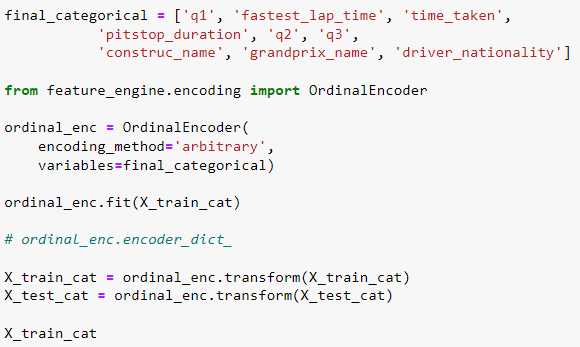

For Ordinal Encoding, each variable's category is translated into a number. The features used for this encoding method are  'q1', 'fastest_lap_time', 'time_taken', 'pitstop_duration', 'q2', 'q3', 'construc_name' and 'driver_nationality'. This method is more suitable for ordinal variables, which are categorical variables with a specific order. 

### 4.5 Numerical Data <a id="part4.5"></a>
#### Power Transformer <a id="part4.5.1"></a>

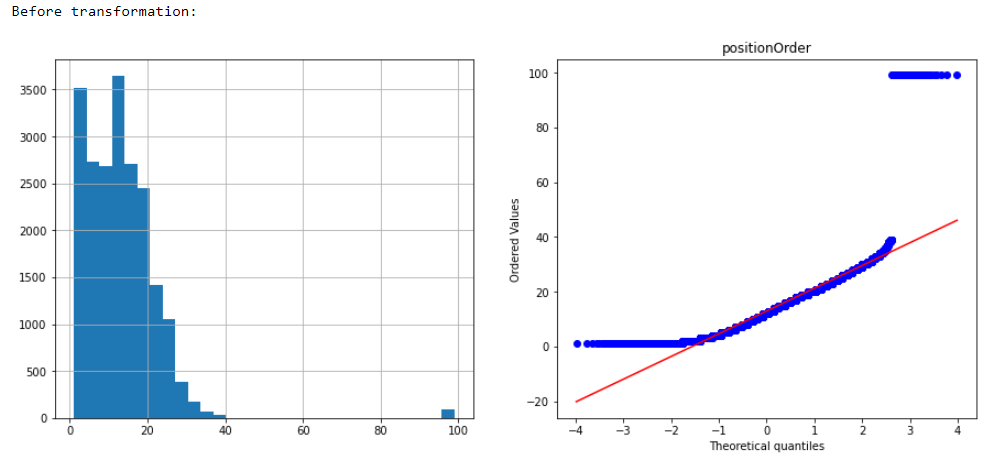

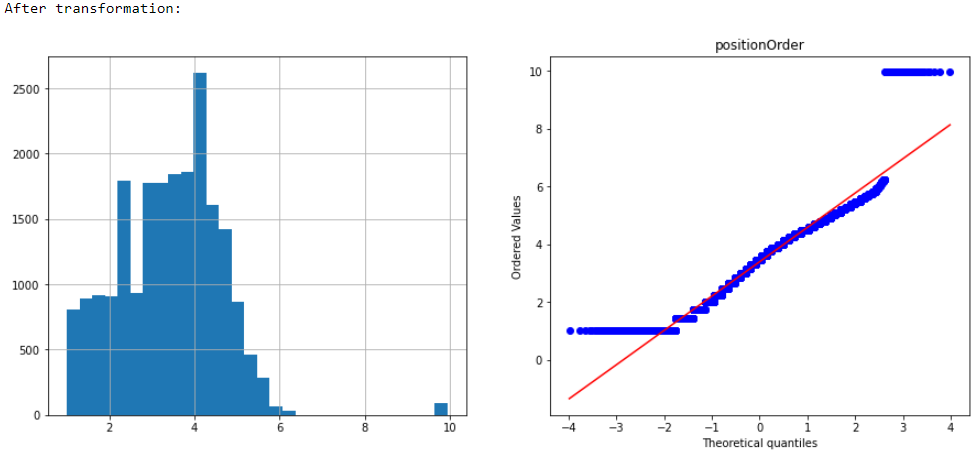

I tried out various methods on the train and test for my numerical encoding such as Yeo Johnson, Power transformer and Box Cox Transformation etc to transform the numerical variables 'positionOrder'. 

After comparisons, Power Transformer shows the best representation among the other methods followed by Yeo Johnson and lastly, the Box Cox transformer.

The target variable 'points' will not undergo this transformation as it is dropped during the train test split.  

As for the missing value numerical 'fastest_lap_rank', 'fastest_lap_speed' feature, it had undergone missing value imputation using the arbituary imputation. Hence, transformation is not required for this feature.

The remaining numerical features are not required to undergo this transformation as the before and after distribution shows insignificant differences.

Thus, the only feature 'positionOrder' will have to undergo this transformation. 

Before transformation, it can be observed that 'positionOrder' is not evenly distributed due to the right-skewed histogram.

After transformation, the distribution is more evenly distributed and closer to a normal distribution.

### 4.6 Equal-frequency discretization <a id="part4.6"></a>

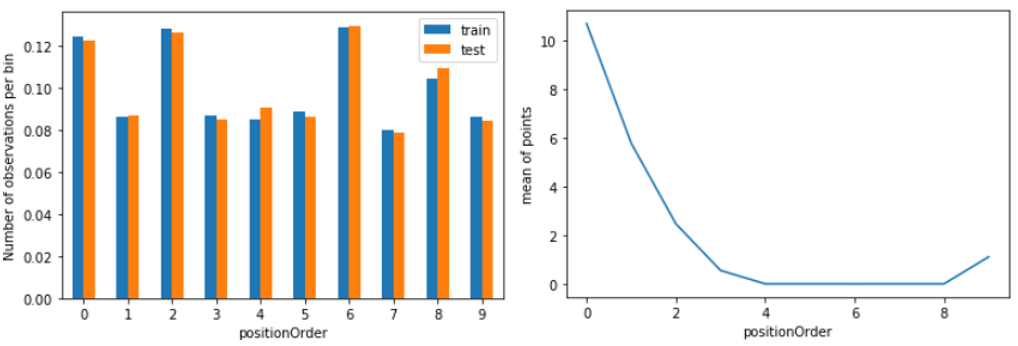

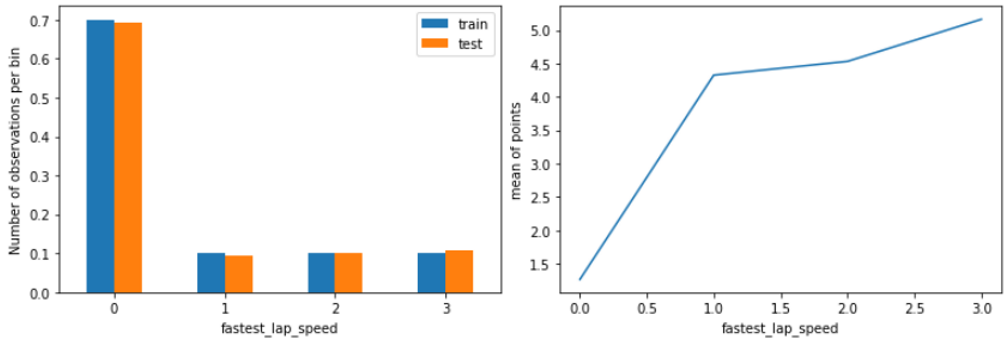

The numerical data requires discretization as I need to transform the variable from continuous numerical data to categorical data. I have chosen 'positionOrder' and 'fastest_lap_speed' for discretization as it performed the best among the other numerical variables.

I have done a comparison between Equal Width and Equal Frequency, and it shows that Equal Frequency provided the best performance. In Equal Frequency discretization, the distribution is more evenly distributed whereas it shows uneven distribution in Equal Width.

Additionally, a line chart is plotted to see if the relationship between 'positionOrder' and the target variable 'points' is monotonic. The other line chart is plotted to see if the relationship between 'fastest_lap_speed' and the target variable 'points' is monotonic.

Both line charts shows that there is a linear relationship between the two numerical features and the target variable 'points'.

### 4.7 Feature scaling <a id="part4.7"></a>

#### Standardization <a id="part4.7.1"></a>

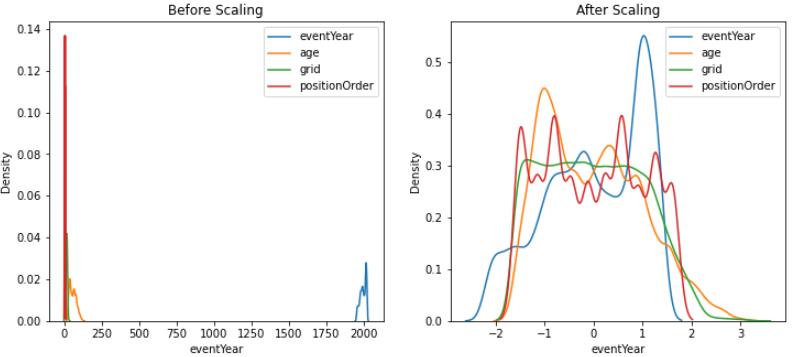

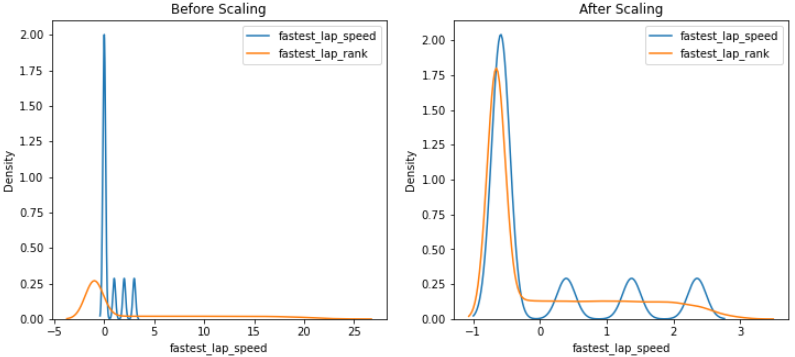

Performing feature scaling is necessary for better comparative analysis as the values in train and test data have high numerical values such as feature of 'eventYear', 'age', 'grid', 'positionOrder', 'fastest_lap_speed', 'fastest_lap_rank'. The model would be inaccurate as the algorithm may be biased toward the feature which has values higher in magnitude. 

Thus, to make a more accurate comparison with the numerical features, the features will be scaled accordingly.

Out of all the methods, Standardization scaling provides the best performance. Feature standardization aids in the rescaling of features to a common scale without distorting the range of the values.

# 5. Machine Learning Model <a id="part5"></a>
### 5.1 Show Count of Rows and Columns <a id="part5.1"></a>

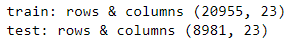

The above image shows the final count of rows and columns for both train and test respectively. Both train and test data have 23 columns but different count of rows. Training and testing data have 20955 and 8981 rows respectively.

### 5.2 Naïve Baseline Model  (for Regression) <a id="part5.2"></a>

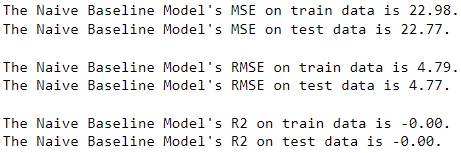

A baseline model serves as a benchmarks for trained models. If the trained models does not outperform the baseline model, it means that the model's increased complexity does not provide enough advantage.

Both MSE and RMSE did not perform well for train and test data. However, R2 performed the worst with a value of -0.00 for both training and testing data.

### 5.3 Linear Regression Model <a id="part5.3"></a>

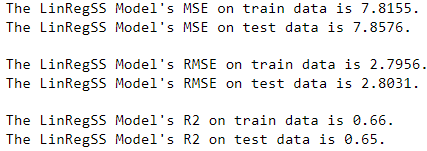


This shows the result of my linear regression model using three measures which are Mean Square Error (MSE), Root-mean-square deviation (RMSE) as well as R-Square (R2). It can be observed that the linear regression model result performs better than the naïve Baseline Model (regression). 

The MSE for my train and test is considerably low at 7.8155 and 7.8576 respectively and the difference between the test_MSE and train_MSE is very minimal around 0.04 whereas the train_r-sq and test_r-sq differ by approximately 0.01. 

This signifies that the differences between the forecast win rates of the Formula 1 and actual win rates of the Formula 1 is insignificant, and that the linear regression is very accurate in the prediction of win rates of the Formula 1.

# 6. Summary and Further Improvements <a id="part6"></a>
### 6.1 Summarize Findings <a id="part6.1"></a>
- Added new columns such as 'age' and 'driverName' to represent driver's age and name respectively.


- Removed unnecessary columns that would not be useful in the win rates of Formula 1 such as 'number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId', 'constructorId', 'dob', 'time', 'forename' and 'surname'


- Renamed features name for better readability. For example, 'name_x' to 'grandprix_name' and 'nationality' to 'driver_nationality' etc.


- Under 'date' feature, replaced incorrect years and filled in the 'blanks' years to correct format based on URL given in the 'race' dataset


- Added a new variable 'eventYear' by extracting .dt.year from the 'date'


- 'time_taken' modified into datetime format in milliseconds and displayed in the format of '%H:%M:%S'.


- 'q1', 'q2', and 'q3' converted to datetime format and extracted using .dt.time.

- Outliers present in 'points', 'fasterst_lap_speed', 'positionOrder'
    - Removal of these outliers are unnecessary due to natural variations in the data


- Train Test Split (70% train and 30% test data)
    - 'raceId' and target variable 'points' is dropped


- Arbitrary value imputation for numerical features, 'fastest_lap_rank' and 'fastest_lap_speed' with value -1 


- Arbitrary value imputation for categorical features, 'time_taken', 'q1', 'q2', 'q3', 'fastest_lap_time', 'pitstop_duration' with 'Missing'


- Encoding Categorical data
    - One Hot Encoding Top Categories (5) on 'driverName'
    
    - Rare Encoding on 'fastest_lap_time', 'time_taken', 'pitstop_duration', 'construc_name', 'driver_nationality', 'status', 'q1', 'q2', 'q3', 'grandprix_name'
    
    - Count/frequency encoding on 'status'
    
    - Ordinal Encoding on 'q1', 'fastest_lap_time', 'time_taken', 'pitstop_duration', 'q2', 'q3', 'construc_name', 'grandprix_name', 'driver_nationality'
    
    
- Power transformation for 'positionOrder'


- Equal frequency discretization for encoding numerical variables, 'positionOrder' and 'fastest_lap_speed'


- Standardization scaling of dataset


- 'positionOrder' shows a weak negative relationship with the target variable 'points' based on the heatmap


- 'resultId' shows a weak postive relationship with target variable 'points'


- Show count of rows and columns of train and test data


- Build and evaluate Naïve Baseline Model (for Regression)


- Build and evaluate Linear Regression Modelling

### 6.2 Possible Further Improvements <a id="part6.2"></a>

Target variable is not included in the numerical transformation due to train test split with the target variable. Therefore, this feature is skewed resulting in a lower model precision.

Amendment to the Train Test Split ratio by increasing the training data (80%) and testing data (20%) helps to improve the accuracy of r-sq.

Removal of retired drivers since they would not be participating in the race anymore.

[Back to top (code)](#top)